In [442]:
import imp
import my_tools
imp.reload(my_tools)

<module 'my_tools' from '/home/ubuntu/thesis_work/my_tools.py'>

In [443]:
from my_tools import *

In [444]:
# Q_BITCOIN
BTC = CoinDataMgr(blocksci_path="/home/ubuntu/bitcoin",
                  path_to_clusters="/home/ubuntu/~/clusters_b",
                  folder_with_calculated="/home/ubuntu/thesis_work/calculated/bitcoin")

Got 523426 blocks
Got 206433637 clusters


In [445]:
BTC[S_GINIS].readAll()
BTC[S_REL_FLOWS].readAll()
BTC[S_FEES].readAll()
BTC[S_NCS].readAll()
BTC[S_UNSPENTS].readAll()
BTC[S_NONEMPTY_CLS].readAll()
BTC[S_CLS_CNTS].readAll()
BTC[S_SYNC_PRICES].readAll()
BTC.prices.readAll()

Reading folder '/home/ubuntu/thesis_work/calculated/bitcoin' with prefix 'int1000b_ginisOfClustersWealth'...
  Got 'int1000b_ginisOfClustersWealth_need2recalculateWOnulldata.json', key is 'need2recalculateWOnulldata'
  Got 'int1000b_ginisOfClustersWealth_log21.json', key is 'log21'
  Got 'int1000b_ginisOfClustersWealth_WOnuldata.json', key is 'WOnuldata'
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/bitcoin' with prefix 'int1000b_relativeFlowVolumes'...
  Got 'int1000b_relativeFlowVolumes_log.json', key is 'log'
  Got 'int1000b_relativeFlowVolumes_nonPar.json', key is 'nonPar'
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/bitcoin' with prefix 'int1000b_fees'...
  Got 'int1000b_fees_log.json', key is 'log'
  Got 'int1000b_fees_nonPar.json', key is 'nonPar'
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/bitcoin' with prefix 'int1000b_NacamotoCoefs'...
  Got 'int1000b_NacamotoCoefs.json', key is ''
Finish
Reading folder '/home/ubuntu/thesis_work/calcu

In [446]:
tag_b = BTC.gatherAllMetrics({S_NCS:'', S_GINIS:'log21', S_REL_FLOWS:'log', S_FEES:'log',
                              S_UNSPENTS:'log', S_NONEMPTY_CLS:'log', S_CLS_CNTS: 'log'})
tag_mean = BTC.rollingMeanAllMetrics(allMetrics_tag=tag_b, common_win=5)

Gathered under tag 'activeClustersCounts=log_unspents=log_ginisOfClustersWealth=log21_NacamotoCoefs=_fees=log_nonEmptyClustersCounts=log_relativeFlowVolumes=log'


/home/ubuntu/thesis_work/my_tools.py:1191: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=True,window=5).mean()
  col_after_rolling = pd.rolling_mean(pd_df[col], window=window, center=True)


kutak!


/home/ubuntu/thesis_work/my_tools.py:1685: RuntimeWarning: divide by zero encountered in log
  axes[-1].set_title('лог. рыночной цены (в USD)')


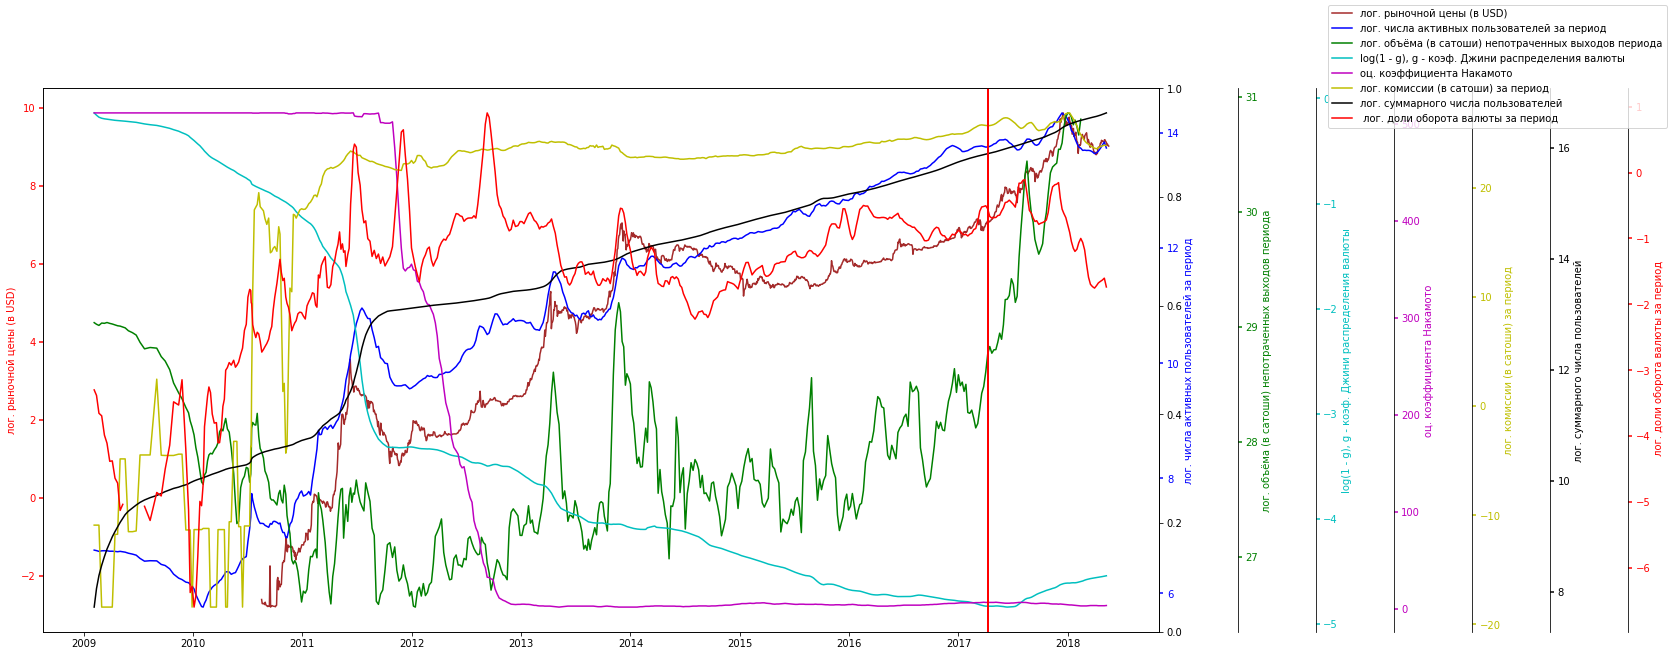

In [449]:
_ = BTC.drawGraphTwinx(allMetrics_tag=tag_mean, vlines=[460], final=True, prices_key='btc_info')

In [438]:
tag_b = BTC.gatherAllMetrics({S_NCS:'', S_GINIS:'log21', S_REL_FLOWS:'log', S_FEES:'log', S_SYNC_PRICES:'log',
                              S_UNSPENTS:'log', S_NONEMPTY_CLS:'log', S_CLS_CNTS:''})
bdf = BTC.allMetrics[tag_b][230:].copy()
del bdf['times']
bdf_s = prepareToArimax(bdf)

Gathered under tag 'synchronizedPrices=log_activeClustersCounts=_unspents=log_ginisOfClustersWealth=log21_NacamotoCoefs=_fees=log_nonEmptyClustersCounts=log_relativeFlowVolumes=log'


In [258]:
new_bdf = bdf.copy()
new_bdf[S_GINIS] = bdf[S_GINIS] - bdf[S_GINIS].shift()
new_bdf[S_NONEMPTY_CLS] = bdf[S_NONEMPTY_CLS] - bdf[S_NONEMPTY_CLS].shift()
new_bdf_s = prepareToArimax(new_bdf)

In [262]:
metrics_list = [col for col in bdf.columns if col != S_REL_FLOWS]
metrics_list_wo_prices = [col for col in bdf.columns if (col != S_REL_FLOWS and col != S_SYNC_PRICES)]

In [270]:
%time new_bdf_bests = getMetricsAndPCombinationsScores(new_bdf_s, metrics_list, 5)

/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarni

/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/pyt

/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/pyt

p = 0 is done


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/pyt

/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/pyt

NacamotoCoefs_ginisOfClustersWealth_nonEmptyClustersCounts_synchronizedPrices is failed
SVD did not converge


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/pyt

/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/pyt

p = 1 is done


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/lo

/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/pyt

/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/pyt

/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 2 is done


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/lo

/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/pyt

/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/pyt

p = 3 is done


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


NacamotoCoefs_unspents is failed
SVD did not converge


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/pyt

/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/pyt

/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/pyt

p = 4 is done


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarni

/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/pyt

/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/pyt

p = 5 is done
CPU times: user 8min 43s, sys: 1min 16s, total: 9min 59s
Wall time: 8min 19s


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [272]:
%time new_bdf_wop_bests = getMetricsAndPCombinationsScores(new_bdf_s, metrics_list_wo_prices, 5)

/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarni

/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/pyt

p = 0 is done


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/pyt

/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/pyt

p = 1 is done


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/lo

/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/pyt

p = 2 is done


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/lo

/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/pyt

p = 3 is done


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


NacamotoCoefs_unspents is failed
SVD did not converge


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/pyt

/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/pyt

p = 4 is done


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarni

/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/pyt

p = 5 is done
CPU times: user 3min 51s, sys: 33.3 s, total: 4min 24s
Wall time: 3min 40s


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [271]:
new_bdf_bests

{'0': ('NacamotoCoefs_fees_ginisOfClustersWealth_nonEmptyClustersCounts_synchronizedPrices_unspents',
  0.23688530824720577),
 '1': ('NacamotoCoefs_fees_nonEmptyClustersCounts_synchronizedPrices',
  0.22286819159815072),
 '2': ('NacamotoCoefs_nonEmptyClustersCounts_synchronizedPrices_unspents',
  0.22176919918012045),
 '3': ('NacamotoCoefs_ginisOfClustersWealth_nonEmptyClustersCounts_synchronizedPrices',
  0.2215196059247273),
 '4': ('NacamotoCoefs_ginisOfClustersWealth_nonEmptyClustersCounts_synchronizedPrices',
  0.22156277390244625),
 '5': ('NacamotoCoefs_ginisOfClustersWealth_nonEmptyClustersCounts_synchronizedPrices_unspents',
  0.22120443328740946)}

In [273]:
new_bdf_wop_bests

{'0': ('NacamotoCoefs_activeClustersCounts_ginisOfClustersWealth_nonEmptyClustersCounts_unspents',
  0.23707440126501131),
 '1': ('NacamotoCoefs_ginisOfClustersWealth_nonEmptyClustersCounts',
  0.22390495197441934),
 '2': ('NacamotoCoefs_fees_ginisOfClustersWealth_nonEmptyClustersCounts_unspents',
  0.22277041792589294),
 '3': ('NacamotoCoefs_fees_ginisOfClustersWealth_nonEmptyClustersCounts_unspents',
  0.22180710042898819),
 '4': ('NacamotoCoefs_fees_ginisOfClustersWealth_nonEmptyClustersCounts_unspents',
  0.22222975551776694),
 '5': ('NacamotoCoefs_ginisOfClustersWealth_nonEmptyClustersCounts',
  0.22201840004548137)}

In [ ]:
NacamotoCoefs_ginisOfClustersWealth_nonEmptyClustersCounts_synchronizedPrices

277

/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/s

step 11
SVD did not converge


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


step 18
SVD did not converge


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:676: RuntimeWarning: divide by zero encountered in true_divide
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:650: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:651: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tools/numdiff.py:243: RuntimeWarning: invalid value encountered in add
  **kwargs)).imag/2./hess[i, j]
/usr/local/lib/python3.5/dist-packages/statsmodels/tools/numdiff.py:243: RuntimeWarning: invalid v

/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/s

step 158
SVD did not converge
step 196
SVD did not converge


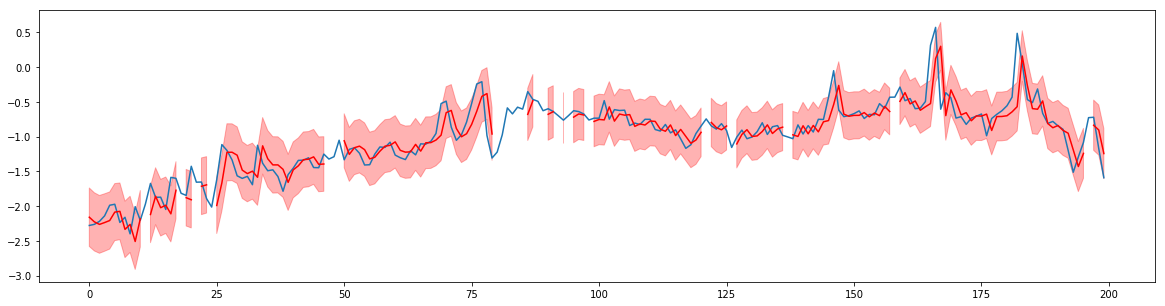

In [277]:
# NEW
predictions_confs_new_bdf_s = ARIMAX_WalkForwardValidation(new_bdf_s[[S_NCS, S_NONEMPTY_CLS, S_SYNC_PRICES, S_GINIS, S_REL_FLOWS]].dropna(),
                             S_REL_FLOWS, -200, (3, 1, 1))

In [288]:
new_bdf_s[S_REL_FLOWS].loc[234:235]

234   -1.579106
235   -1.385275
Name: relativeFlowVolumes, dtype: float64

In [ ]:
new_bdf_s[S_REL_FLOWS].il

In [286]:
new_bdf_s[S_REL_FLOWS][:1]

234   -1.579106
Name: relativeFlowVolumes, dtype: float64

In [295]:
def drawForecastResults(reals, predictions_confs, figsize=(15, 5), times=None, begin=None, end=None):
    f = plt.figure(figsize=figsize)
    ax = f.subplots()
    
    index = predictions_confs['index']
    if not times is None:
        x = [times[i] for i in index]
    else:
        x = index
    
    ax.plot(x, reals.loc[index[0]:index[-1] + 1])
    ax.plot(x, predictions_confs['predictions'], color='red')
    if times is None:
        ax.set_xlabel('Период')
    ax.set_ylabel('Лог. доли валютного оборота')
    ax.fill_between(x, y1=predictions_confs['conf_1'], y2=predictions_confs['conf_2'], color='red', alpha=0.3)
    f.show()
    return f

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


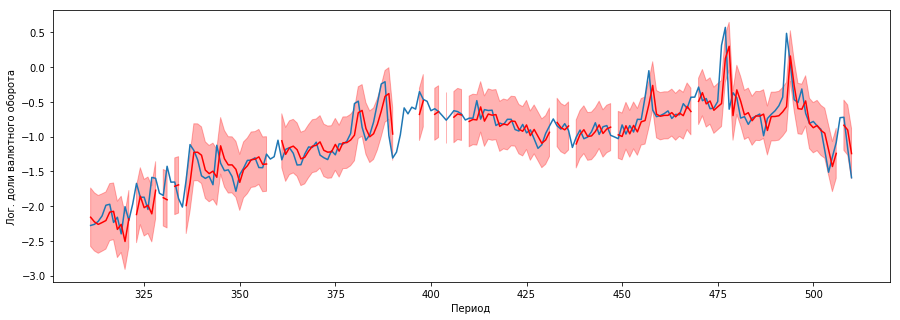

In [296]:
_ = drawForecastResults(new_bdf_s[S_REL_FLOWS], predictions_confs_new_bdf_s)

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


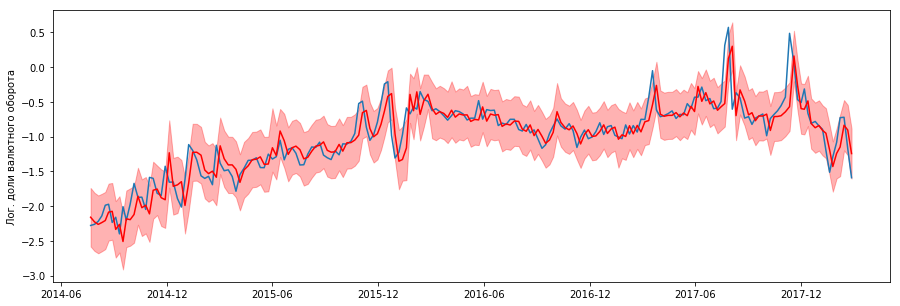

In [375]:
_b200 = drawForecastResults(new_bdf_s[S_REL_FLOWS], predictions_confs_new_bdf_s, times=BTC.times)

In [ ]:
_b200

In [373]:
saveJson(predictions_confs_new_bdf_s, 'predictions_confs_new_bdf_s_200_LOG')

TypeError: Int64Index([311, 312, 313, 314, 315, 316, 317, 318, 319, 320,
            ...
            501, 502, 503, 504, 505, 506, 507, 508, 509, 510],
           dtype='int64', length=200) is not JSON serializable

In [376]:
_b200.savefig('BTC_new_bdf_s_200_LOG.png')

In [324]:
predictions_confs_new_bdf_fixed['predictions'][21] == np.array([np.nan], dtype=np.float64)

array([False], dtype=bool)

In [323]:
type(predictions_confs_new_bdf_fixed['predictions'][21][0])

numpy.float64

In [326]:
np.isnan(predictions_confs_new_bdf_fixed['predictions'][21][0])

True

In [357]:
rmses = [0.12494, 0.12502,0.13433,0.13552,0.13398,0.14654]


In [359]:
rmse_coef = 0.22180710042898819 / rmses[0]

In [360]:
new_rmses = [r * rmse_coef for r in rmses]

In [361]:
new_rmses

[0.22180710042898819,
 0.22194912514512646,
 0.23847725148572102,
 0.2405898691382782,
 0.23785589335261592,
 0.26015377378632887]

In [350]:
def fillNonePredictions(reals, predictions_confs):
    index = predictions_confs['index']
    reals = reals.loc[index[0]:index[-1] + 1].values
    fixed_predictions = predictions_confs['predictions'].copy()
    fixed_confs_1 = predictions_confs['conf_1'].copy()
    fixed_confs_2 = predictions_confs['conf_2'].copy()
    
    for i in range(1, len(reals)):
        if np.isnan(fixed_predictions[i]):
            fixed_predictions[i] = reals[i-1] * (1 + np.random.randn(1)/10)
            multy = (1 + np.random.randn(1)/10)
            print(multy)
            conf_int = prev_conf_int * multy
            fixed_confs_1[i] = fixed_predictions[i] + conf_int
            fixed_confs_2[i] = fixed_predictions[i] - conf_int
        else:
            prev_conf_int = fixed_confs_1[i] - fixed_predictions[i]
    return {'index': predictions_confs['index'],
            'predictions': fixed_predictions,
            'conf_1': fixed_confs_1,
            'conf_2': fixed_confs_2}

In [351]:
predictions_confs_new_bdf_fixed = fillNonePredictions(new_bdf_s[S_REL_FLOWS], predictions_confs_new_bdf_s)

/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/s

step 11
SVD did not converge


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


step 18
SVD did not converge


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:676: RuntimeWarning: divide by zero encountered in true_divide
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:650: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:651: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tools/numdiff.py:243: RuntimeWarning: invalid value encountered in add
  **kwargs)).imag/2./hess[i, j]
/usr/local/lib/python3.5/dist-packages/statsmodels/tools/numdiff.py:243: RuntimeWarning: invalid v

/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/s

step 158
SVD did not converge
step 196
SVD did not converge


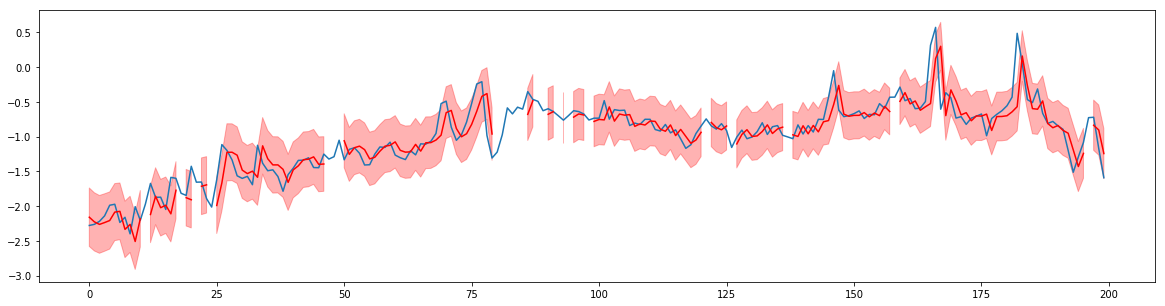

In [277]:
# NEW
predictions_confs_new_bdf_s = ARIMAX_WalkForwardValidation(new_bdf_s[[S_NCS, S_NONEMPTY_CLS, S_SYNC_PRICES, S_GINIS, S_REL_FLOWS]].dropna(),
                             S_REL_FLOWS, -200, (3, 1, 1))

In [218]:
tag_b = BTC.gatherAllMetrics({S_NCS:'', S_GINIS:'log21', S_REL_FLOWS:'nonPar', S_FEES:'nonPar',
                              S_UNSPENTS:'par', S_NONEMPTY_CLS:'log', S_CLS_CNTS: 'log'})
tag_mean = BTC.rollingMeanAllMetrics(allMetrics_tag=tag_b, common_win=5)

Gathered under tag 'activeClustersCounts=log_unspents=par_ginisOfClustersWealth=log21_NacamotoCoefs=_fees=nonPar_nonEmptyClustersCounts=log_relativeFlowVolumes=nonPar'


/home/ubuntu/thesis_work/my_tools.py:1154: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=True,window=5).mean()
  col_after_rolling = pd.rolling_mean(pd_df[col], window=window, center=True)


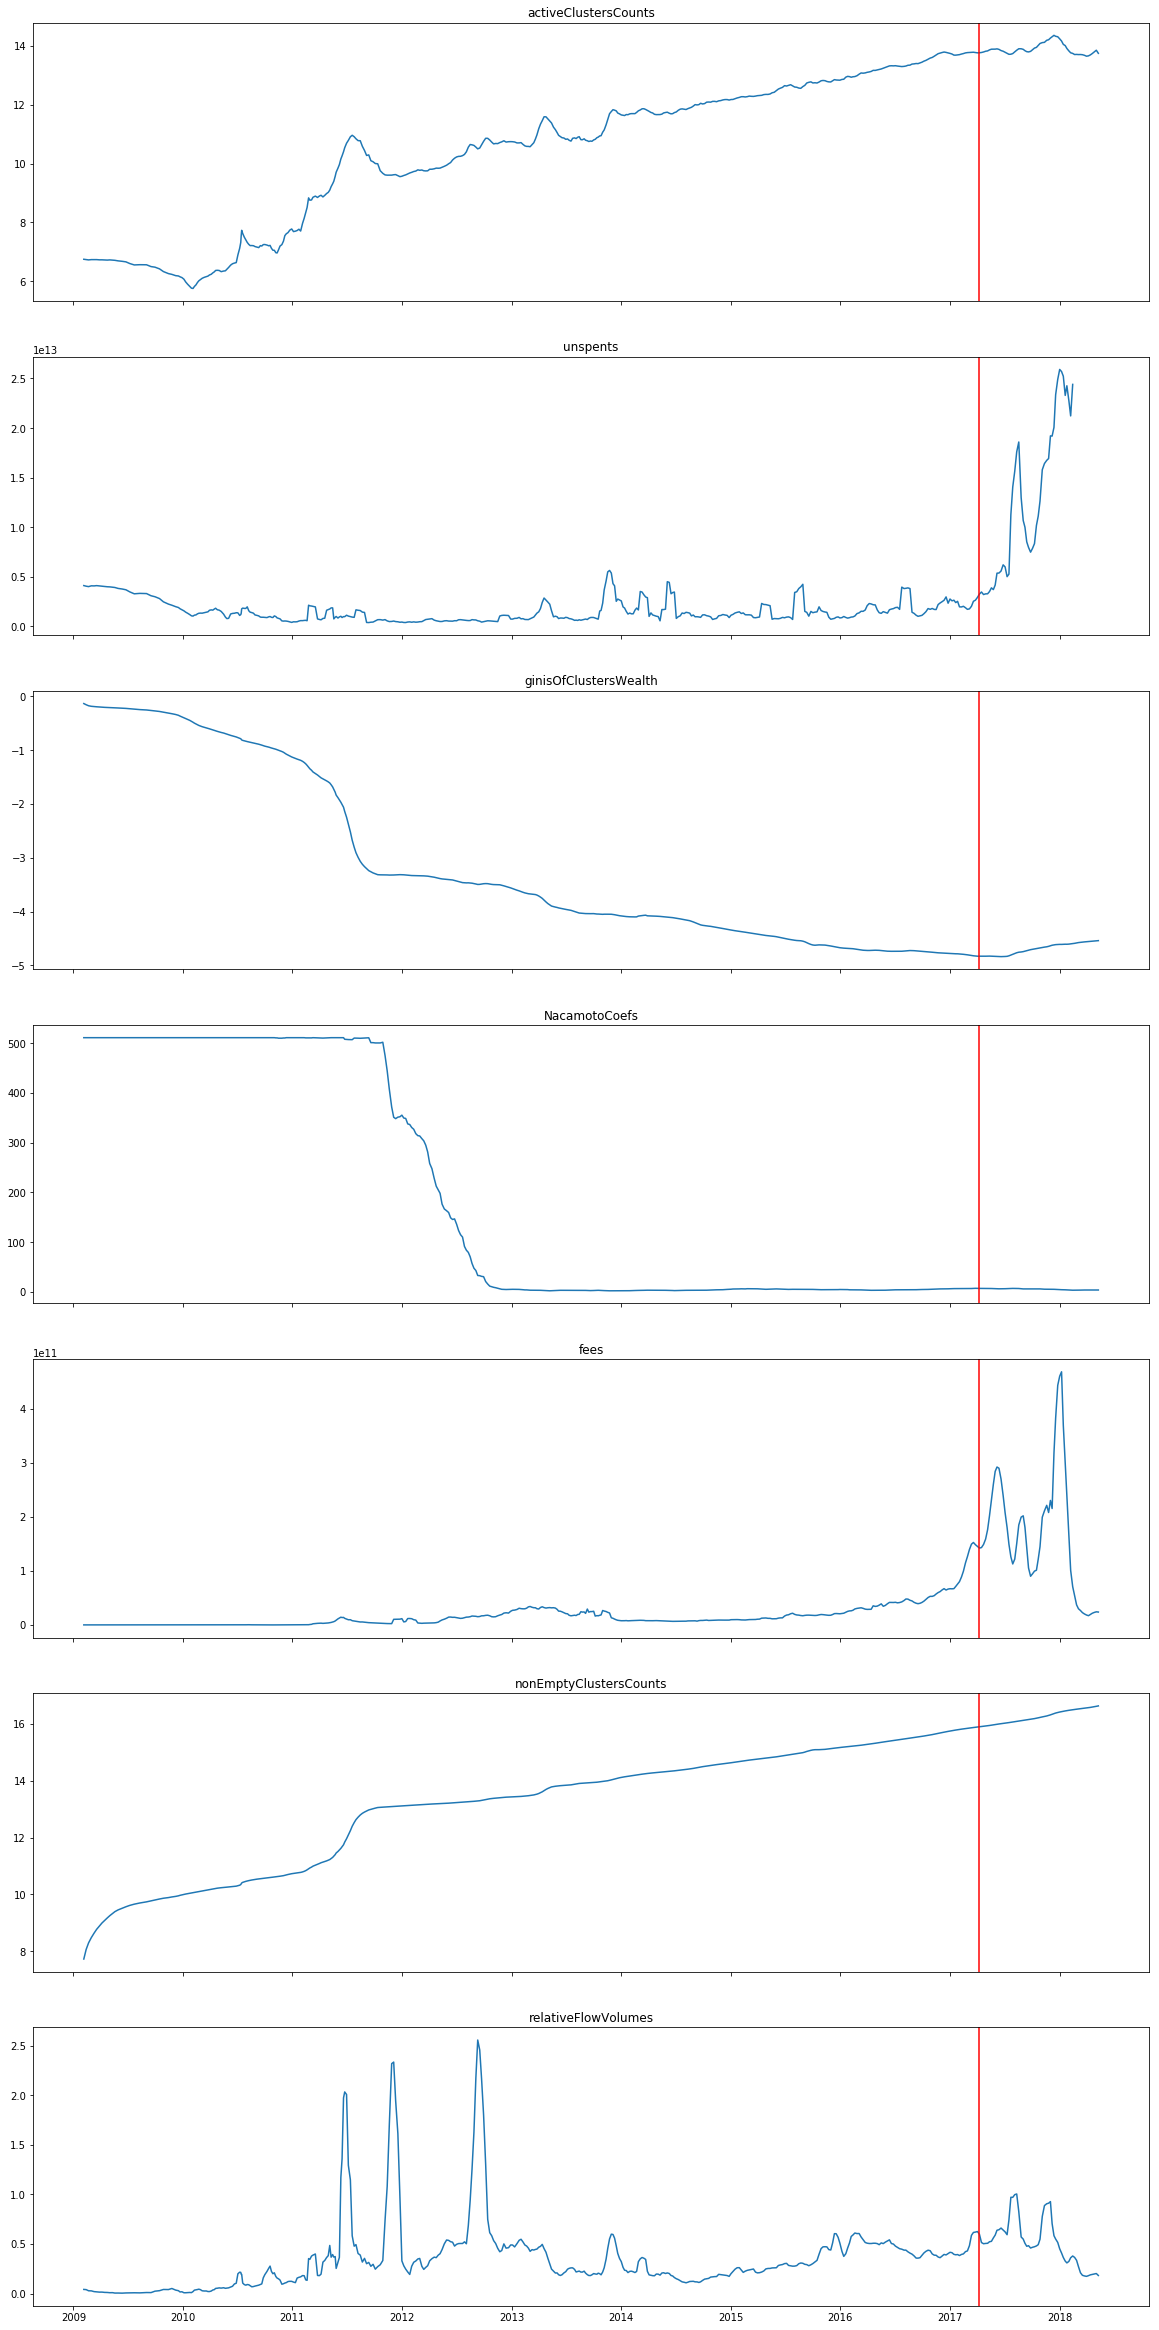

In [223]:
_ = BTC.drawGraph(allMetrics_tag=tag_mean, vlines=[460], final=False)

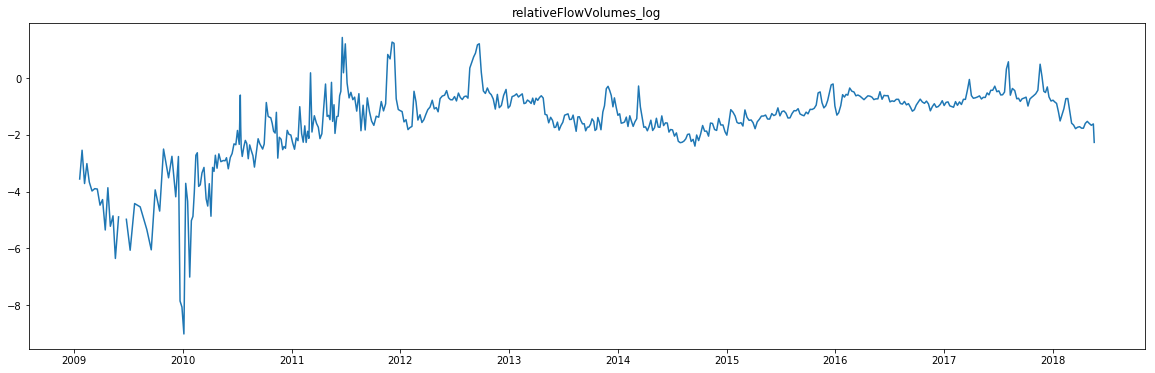

In [222]:
_ = BTC.drawGraph({S_REL_FLOWS: 'log'}, final=False)

In [231]:
tag_rf = LTC.gatherAllMetrics({S_REL_FLOWS: 'par_cutTop1.5'})

Gathered under tag 'relativeFlowVolumes=par_cutTop1.5'


In [233]:
tag_rg_mean = LTC.rollingMeanAllMetrics(tag_rf, common_win=20)

There is already relativeFlowVolumes=par_cutTop1.5_rolledMeanComWnd=20 version of data, stop


/home/ubuntu/thesis_work/my_tools.py:1154: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=True,window=20).mean()
  col_after_rolling = pd.rolling_mean(pd_df[col], window=window, center=True)


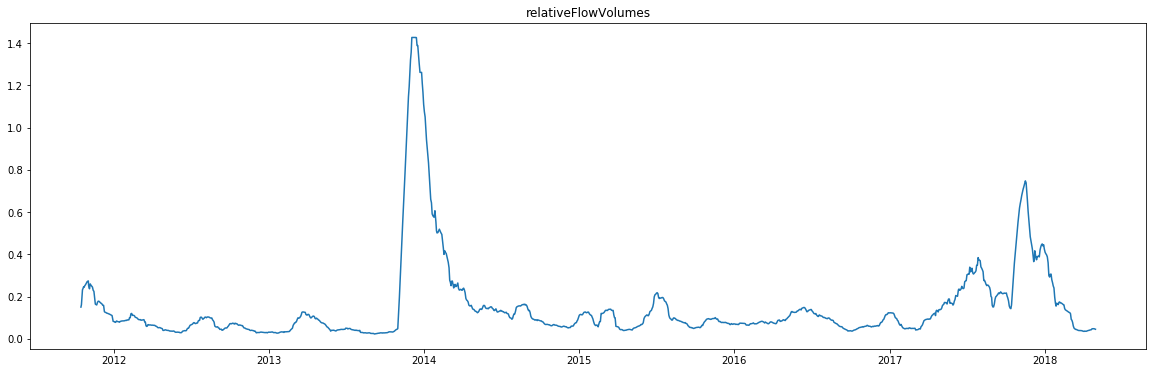

In [240]:
_ = LTC.drawGraph(allMetrics_tag=tag_rg_mean, final=False, begin=None)

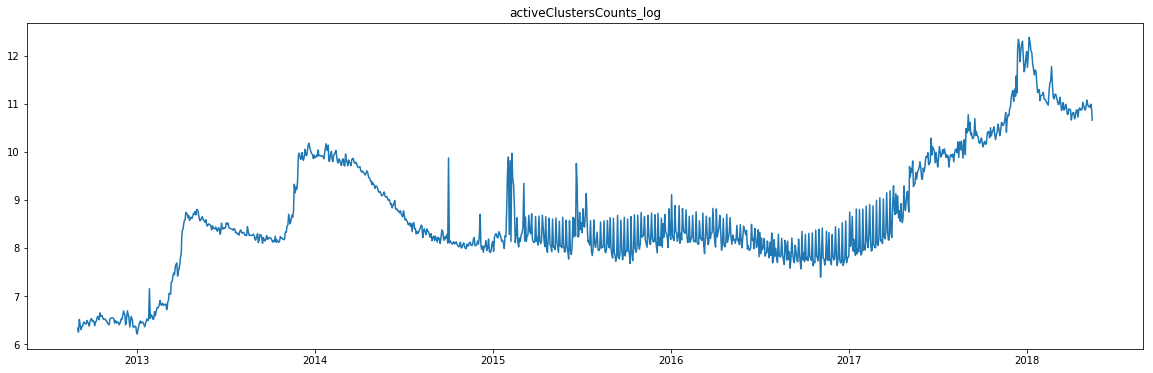

In [253]:
_ = LTC.drawGraph({S_CLS_CNTS:'log'}, final=False, begin=200)

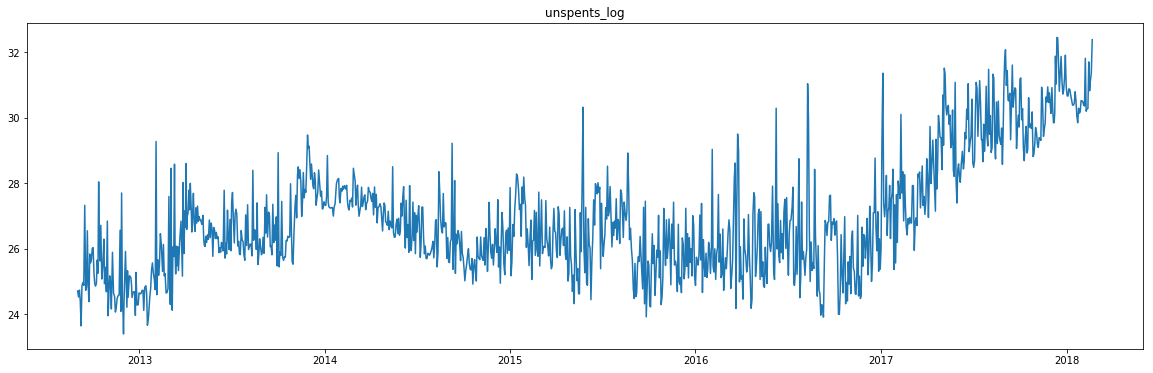

In [254]:
_ = LTC.drawGraph({S_UNSPENTS:'log'}, final=False, begin=200)

In [243]:
LTC[S_FEES].readAll()

Reading folder '/home/ubuntu/thesis_work/calculated/litecoin' with prefix 'int1000b_fees'...
  Got 'int1000b_fees_log.json', key is 'log'
  Got 'int1000b_fees_par.json', key is 'par'
Finish


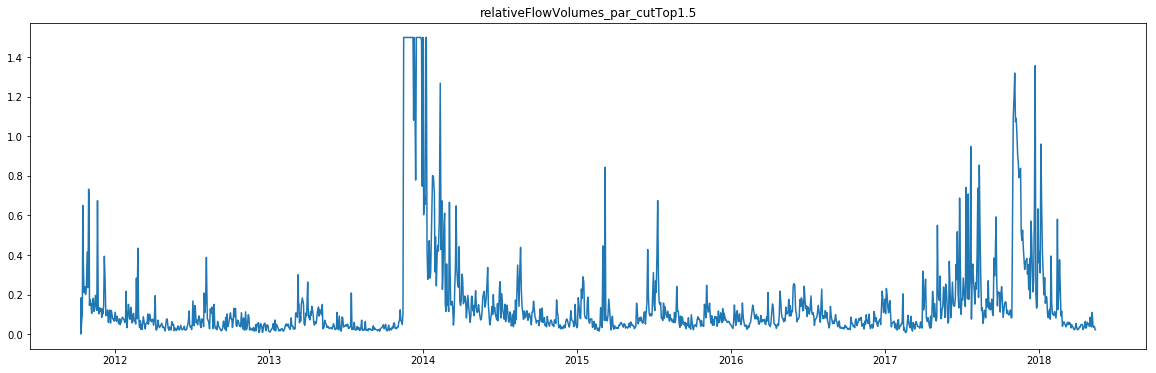

In [239]:
_ = LTC.drawGraph({S_REL_FLOWS:'par_cutTop1.5'}, final=False)

In [225]:
LTC[S_REL_FLOWS].readAll()

Reading folder '/home/ubuntu/thesis_work/calculated/litecoin' with prefix 'int1000b_relativeFlowVolumes'...
  Got 'int1000b_relativeFlowVolumes_log.json', key is 'log'
  Got 'int1000b_relativeFlowVolumes_par.json', key is 'par'
  Got 'int1000b_relativeFlowVolumes_par_cutTop1.5.json', key is 'par_cutTop1.5'
Finish


In [92]:
bdf = BTC.allMetrics[tag_mean].copy()
bdf.dropna(inplace=True)

ddf = pd.DataFrame()
for col in bdf:
    ddf[col] = getDiff(bdf[col])
ddf.dropna(inplace=True)

ddf2 = ddf.copy()
ddf2[S_GINIS] = getDiff(ddf[S_GINIS])
ddf2[S_NONEMPTY_CLS] = getDiff(ddf[S_NONEMPTY_CLS])
ddf2.dropna(inplace=True)

In [ ]:
#Q_CORR

In [381]:
tag_b = BTC.gatherAllMetrics({S_NCS:'', S_GINIS:'log21', S_REL_FLOWS:'log', S_FEES:'log',
                              S_UNSPENTS:'log', S_NONEMPTY_CLS:'log', S_SYNC_PRICES: 'log', S_CLS_CNTS: 'log'})
tag_1 = BTC.rollingMeanAllMetrics(allMetrics_tag=tag_b, common_win=1)

Gathered under tag 'synchronizedPrices=log_activeClustersCounts=log_unspents=log_ginisOfClustersWealth=log21_NacamotoCoefs=_fees=log_nonEmptyClustersCounts=log_relativeFlowVolumes=log'


In [382]:
bdf1 = BTC.allMetrics[tag_1].copy()
bdf1.dropna(inplace=True)

ddf1 = pd.DataFrame()
for col in bdf1:
    ddf1[col] = getDiff(bdf1[col])
ddf1.dropna(inplace=True)

ddf21 = ddf.copy()
ddf21[S_GINIS] = getDiff(ddf1[S_GINIS])
ddf21[S_NONEMPTY_CLS] = getDiff(ddf1[S_NONEMPTY_CLS])
ddf21.dropna(inplace=True)

In [383]:
bdf1.corr()

,NacamotoCoefs,activeClustersCounts,fees,ginisOfClustersWealth,nonEmptyClustersCounts,relativeFlowVolumes,synchronizedPrices,unspents
NacamotoCoefs,1.000000,0.672138,0.533931,-0.712264,0.667079,0.421478,0.333217,0.256412
activeClustersCounts,0.672138,1.000000,0.772250,-0.929727,0.975597,0.708742,0.757282,0.599688
fees,0.533931,0.772250,1.000000,-0.685707,0.817090,0.694837,0.679799,0.649621
ginisOfClustersWealth,-0.712264,-0.929727,-0.685707,1.000000,-0.905435,-0.696781,-0.509827,-0.387043
nonEmptyClustersCounts,0.667079,0.975597,0.817090,-0.905435,1.000000,0.680956,0.794083,0.649943
relativeFlowVolumes,0.421478,0.708742,0.694837,-0.696781,0.680956,1.000000,0.505269,0.535155
synchronizedPrices,0.333217,0.757282,0.679799,-0.509827,0.794083,0.505269,1.000000,0.807802
unspents,0.256412,0.599688,0.649621,-0.387043,0.649943,0.535155,0.807802,1.000000


In [380]:
bdf.corr()

,NacamotoCoefs,activeClustersCounts,fees,ginisOfClustersWealth,nonEmptyClustersCounts,relativeFlowVolumes,synchronizedPrices,unspents
NacamotoCoefs,1.000000,0.568663,0.526094,-0.702117,0.579934,0.413115,0.254540,0.243912
activeClustersCounts,0.568663,1.000000,0.862990,-0.764930,0.921187,0.585585,0.835083,0.703356
fees,0.526094,0.862990,1.000000,-0.653289,0.715103,0.685581,0.592108,0.648596
ginisOfClustersWealth,-0.702117,-0.764930,-0.653289,1.000000,-0.865138,-0.616221,-0.489658,-0.360375
nonEmptyClustersCounts,0.579934,0.921187,0.715103,-0.865138,1.000000,0.495963,0.827044,0.624505
relativeFlowVolumes,0.413115,0.585585,0.685581,-0.616221,0.495963,1.000000,0.348388,0.534589
synchronizedPrices,0.254540,0.835083,0.592108,-0.489658,0.827044,0.348388,1.000000,0.807802
unspents,0.243912,0.703356,0.648596,-0.360375,0.624505,0.534589,0.807802,1.000000


In [25]:
corr = bdf.corr()

In [28]:
corr.index

Index(['NacamotoCoefs', 'activeClustersCounts', 'fees',
       'ginisOfClustersWealth', 'nonEmptyClustersCounts',
       'relativeFlowVolumes', 'synchronizedPrices', 'unspents'],
      dtype='object')

In [87]:
def todaYamamotoDf(df, verbose=0):
    ty_df = df.corr().copy()
    for col in ty_df.columns:
        for ind in ty_df.index:
            if ind == col:
                ty_df[col][ind] = None
                continue
            if verbose >= 1:
                print('y={},   x={}'.format(col, ind))
            ty_df[col][ind], ty_df[ind][col] = todaYamamoto(df[col], df[ind], verbose=verbose)
            if verbose >= 1:
                print('-------------------------------')
    return ty_df

In [393]:
import scipy
def pearsonDf(df, verbose=0, signs=3):
    coef_df = df.corr().copy()
    p_df = df.corr().copy()
    for col in coef_df.columns:
        for ind in coef_df.index:
            if ind == col:
                coef_df[col][ind] = None
                p_df[col][ind] = None
                continue
            if verbose >= 1:
                print('y={},   x={}'.format(col, ind))
                
            coef, p = scipy.stats.pearsonr(df[col], df[ind])
            coef_df[col][ind], coef_df[ind][col] = round(coef,signs), round(coef,signs)
            p_df[col][ind], p_df[ind][col] = p, p
            if verbose >= 1:
                print('-------------------------------')
    return coef_df, p_df

In [395]:
coef_bdf1, p_bdf1 = pearsonDf(bdf1)

In [ ]:
def pearsonDf(df)

In [396]:
coef_bdf1

,NacamotoCoefs,activeClustersCounts,fees,ginisOfClustersWealth,nonEmptyClustersCounts,relativeFlowVolumes,synchronizedPrices,unspents
NacamotoCoefs,NaN,0.672,0.534,-0.712,0.667,0.421,0.333,0.256
activeClustersCounts,0.672,NaN,0.772,-0.930,0.976,0.709,0.757,0.600
fees,0.534,0.772,NaN,-0.686,0.817,0.695,0.680,0.650
ginisOfClustersWealth,-0.712,-0.930,-0.686,NaN,-0.905,-0.697,-0.510,-0.387
nonEmptyClustersCounts,0.667,0.976,0.817,-0.905,NaN,0.681,0.794,0.650
relativeFlowVolumes,0.421,0.709,0.695,-0.697,0.681,NaN,0.505,0.535
synchronizedPrices,0.333,0.757,0.680,-0.510,0.794,0.505,NaN,0.808
unspents,0.256,0.600,0.650,-0.387,0.650,0.535,0.808,NaN


In [390]:
bdf1.corr()

,NacamotoCoefs,activeClustersCounts,fees,ginisOfClustersWealth,nonEmptyClustersCounts,relativeFlowVolumes,synchronizedPrices,unspents
NacamotoCoefs,1.000000,0.672138,0.533931,-0.712264,0.667079,0.421478,0.333217,0.256412
activeClustersCounts,0.672138,1.000000,0.772250,-0.929727,0.975597,0.708742,0.757282,0.599688
fees,0.533931,0.772250,1.000000,-0.685707,0.817090,0.694837,0.679799,0.649621
ginisOfClustersWealth,-0.712264,-0.929727,-0.685707,1.000000,-0.905435,-0.696781,-0.509827,-0.387043
nonEmptyClustersCounts,0.667079,0.975597,0.817090,-0.905435,1.000000,0.680956,0.794083,0.649943
relativeFlowVolumes,0.421478,0.708742,0.694837,-0.696781,0.680956,1.000000,0.505269,0.535155
synchronizedPrices,0.333217,0.757282,0.679799,-0.509827,0.794083,0.505269,1.000000,0.807802
unspents,0.256412,0.599688,0.649621,-0.387043,0.649943,0.535155,0.807802,1.000000


In [88]:
todaYamamotoDf(bdf)

/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was pro

/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was pro

,NacamotoCoefs,activeClustersCounts,fees,ginisOfClustersWealth,nonEmptyClustersCounts,relativeFlowVolumes,synchronizedPrices,unspents
NacamotoCoefs,NaN,0.145,0.013,0.535,0.335,0.342,0.103,0.388
activeClustersCounts,0.140,NaN,0.000,0.442,0.583,0.014,0.003,0.742
fees,0.631,0.005,NaN,0.058,0.472,0.236,0.019,0.085
ginisOfClustersWealth,0.545,0.000,0.187,NaN,0.454,0.056,0.059,0.000
nonEmptyClustersCounts,0.906,0.553,0.021,0.285,NaN,0.421,0.320,0.165
relativeFlowVolumes,0.423,0.003,0.243,0.033,0.560,NaN,0.005,0.003
synchronizedPrices,0.206,0.056,0.653,0.085,0.336,0.190,NaN,0.032
unspents,0.637,0.992,0.413,0.419,0.036,0.512,0.090,NaN


In [408]:
tag_l = LTC.gatherAllMetrics({S_NCS:'', S_GINIS:'log21', S_REL_FLOWS:'log', S_FEES:'log',
                              S_UNSPENTS:'log', S_NONEMPTY_CLS:'log', S_SYNC_PRICES: 'log', S_CLS_CNTS: 'log'})

Gathered under tag 'synchronizedPrices=log_activeClustersCounts=log_unspents=log_ginisOfClustersWealth=log21_NacamotoCoefs=_fees=log_nonEmptyClustersCounts=log_relativeFlowVolumes=log'


In [409]:
bdf1_l = LTC.allMetrics[tag_l].copy()
bdf1_l.dropna(inplace=True)

ddf1_l = pd.DataFrame()
for col in bdf1_l:
    ddf1_l[col] = getDiff(bdf1_l[col])
ddf1_l.dropna(inplace=True)

ddf21_l = ddf1_l.copy()
ddf21_l[S_GINIS] = getDiff(ddf1_l[S_GINIS])
ddf21_l[S_NONEMPTY_CLS] = getDiff(ddf1_l[S_NONEMPTY_CLS])
ddf21_l.dropna(inplace=True)

In [410]:
coef_bdf_l, p_bdf_l = pearsonDf(bdf1_l)

In [411]:
coef_bdf1

,NacamotoCoefs,activeClustersCounts,fees,ginisOfClustersWealth,nonEmptyClustersCounts,relativeFlowVolumes,synchronizedPrices,unspents
NacamotoCoefs,NaN,0.672,0.534,-0.712,0.667,0.421,0.333,0.256
activeClustersCounts,0.672,NaN,0.772,-0.930,0.976,0.709,0.757,0.600
fees,0.534,0.772,NaN,-0.686,0.817,0.695,0.680,0.650
ginisOfClustersWealth,-0.712,-0.930,-0.686,NaN,-0.905,-0.697,-0.510,-0.387
nonEmptyClustersCounts,0.667,0.976,0.817,-0.905,NaN,0.681,0.794,0.650
relativeFlowVolumes,0.421,0.709,0.695,-0.697,0.681,NaN,0.505,0.535
synchronizedPrices,0.333,0.757,0.680,-0.510,0.794,0.505,NaN,0.808
unspents,0.256,0.600,0.650,-0.387,0.650,0.535,0.808,NaN


In [412]:
coef_bdf_l

,NacamotoCoefs,activeClustersCounts,fees,ginisOfClustersWealth,nonEmptyClustersCounts,relativeFlowVolumes,synchronizedPrices,unspents
NacamotoCoefs,NaN,0.012,0.042,0.632,-0.552,-0.038,-0.024,-0.064
activeClustersCounts,0.012,NaN,0.415,0.361,0.476,0.585,0.916,0.777
fees,0.042,0.415,NaN,-0.026,-0.013,0.246,0.385,0.363
ginisOfClustersWealth,0.632,0.361,-0.026,NaN,-0.379,0.213,0.230,0.136
nonEmptyClustersCounts,-0.552,0.476,-0.013,-0.379,NaN,0.224,0.582,0.475
relativeFlowVolumes,-0.038,0.585,0.246,0.213,0.224,NaN,0.589,0.487
synchronizedPrices,-0.024,0.916,0.385,0.230,0.582,0.589,NaN,0.791
unspents,-0.064,0.777,0.363,0.136,0.475,0.487,0.791,NaN


In [413]:
p_bdf_l

,NacamotoCoefs,activeClustersCounts,fees,ginisOfClustersWealth,nonEmptyClustersCounts,relativeFlowVolumes,synchronizedPrices,unspents
NacamotoCoefs,NaN,6.955987e-01,1.829820e-01,1.010861e-115,4.264710e-83,2.176444e-01,4.340263e-01,3.883629e-02
activeClustersCounts,6.955987e-01,NaN,4.694543e-44,4.219717e-33,1.915215e-59,1.872742e-95,0.000000e+00,8.706097e-209
fees,1.829820e-01,4.694543e-44,NaN,4.138312e-01,6.774729e-01,1.138457e-15,1.076989e-37,2.016011e-33
ginisOfClustersWealth,1.010861e-115,4.219717e-33,4.138312e-01,NaN,1.552661e-36,5.242400e-12,8.263999e-14,1.291766e-05
nonEmptyClustersCounts,4.264710e-83,1.915215e-59,6.774729e-01,1.552661e-36,NaN,3.639940e-13,1.775345e-94,6.584595e-59
relativeFlowVolumes,2.176444e-01,1.872742e-95,1.138457e-15,5.242400e-12,3.639940e-13,NaN,3.110081e-97,2.462390e-62
synchronizedPrices,4.340263e-01,0.000000e+00,1.076989e-37,8.263999e-14,1.775345e-94,3.110081e-97,NaN,1.095937e-221
unspents,3.883629e-02,8.706097e-209,2.016011e-33,1.291766e-05,6.584595e-59,2.462390e-62,1.095937e-221,NaN


In [416]:
r_xy = bdf1.corr()[S_CLS_CNTS][S_GINIS]
r_xz = bdf1.corr()[S_NONEMPTY_CLS][S_GINIS]
r_yz = bdf1.corr()[S_CLS_CNTS][S_NONEMPTY_CLS]

In [417]:
r_xy, r_yz, r_xz

(-0.9297274400363873, 0.97559725591125046, -0.90543505718016426)

In [420]:
def partialCorr(r_xy, r_yz, r_xz):
    return (r_xy - r_xz * r_yz) / np.sqrt(1 - r_xz**2) / np.sqrt(1 - r_yz**2)

In [429]:
bdf1.loc[141]

KeyError: 'the label [141] is not in the [index]'

In [433]:
checkStationarities(ddf1.loc[:465])

NacamotoCoefs
prob if stationary: 0.1
prob if NOT stationary: 7.76260054397e-26
activeClustersCounts
prob if stationary: 0.1
prob if NOT stationary: 0.0
fees
prob if stationary: 0.012075635265005588
prob if NOT stationary: 2.88417555596e-25
ginisOfClustersWealth
prob if stationary: 0.1
prob if NOT stationary: 4.21419464378e-28
nonEmptyClustersCounts
prob if stationary: 0.1
prob if NOT stationary: 7.52819070147e-17
relativeFlowVolumes
prob if stationary: 0.1
prob if NOT stationary: 9.07389308932e-17
synchronizedPrices
prob if stationary: 0.1
prob if NOT stationary: 1.13280282762e-12
unspents
prob if stationary: 0.1
prob if NOT stationary: 2.89602304261e-13


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than 

In [30]:
df = pd.DataFrame(columns=corr.index, index=corr.index)
#df.columns = corr.index
#df.index = corr.index

In [34]:
df[S_NCS][S_FEES] = 1

In [35]:
df

,NacamotoCoefs,activeClustersCounts,fees,ginisOfClustersWealth,nonEmptyClustersCounts,relativeFlowVolumes,synchronizedPrices,unspents
NacamotoCoefs,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
activeClustersCounts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fees,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ginisOfClustersWealth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nonEmptyClustersCounts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relativeFlowVolumes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
synchronizedPrices,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
unspents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [424]:
checkStationarities(bdf1)

NacamotoCoefs
prob if stationary: 0.01
prob if NOT stationary: 0.453531763439
activeClustersCounts
prob if stationary: 0.01
prob if NOT stationary: 0.803466728724
fees
prob if stationary: 0.01
prob if NOT stationary: 0.622573537671
ginisOfClustersWealth
prob if stationary: 0.01
prob if NOT stationary: 0.293110814994
nonEmptyClustersCounts
prob if stationary: 0.01
prob if NOT stationary: 1.0
relativeFlowVolumes
prob if stationary: 0.01
prob if NOT stationary: 0.134465784786
synchronizedPrices
prob if stationary: 0.01
prob if NOT stationary: 0.940539308127
unspents
prob if stationary: 0.01
prob if NOT stationary: 0.94380339095


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1276: InterpolationWarning: p-value is smaller than 

In [425]:
checkStationarities(ddf1)

NacamotoCoefs
prob if stationary: 0.1
prob if NOT stationary: 3.59032671539e-26
activeClustersCounts
prob if stationary: 0.1
prob if NOT stationary: 0.0
fees
prob if stationary: 0.1
prob if NOT stationary: 1.80630437736e-08
ginisOfClustersWealth
prob if stationary: 0.01
prob if NOT stationary: 0.000170715899129
nonEmptyClustersCounts
prob if stationary: 0.021514407594422722
prob if NOT stationary: 1.07036101506e-09
relativeFlowVolumes
prob if stationary: 0.1
prob if NOT stationary: 6.00524595624e-09
synchronizedPrices
prob if stationary: 0.1
prob if NOT stationary: 2.23936962109e-16
unspents
prob if stationary: 0.1
prob if NOT stationary: 4.68670604058e-15


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than 

In [427]:
testStationarityTwice(getDiff(ddf1[S_NONEMPTY_CLS]))

prob if stationary: 0.1
prob if NOT stationary: 1.52067280072e-15


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [428]:
testStationarityTwice(getDiff(ddf1[S_GINIS]))

prob if stationary: 0.1
prob if NOT stationary: 4.47492647991e-13


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [397]:
# Q_LITECOIN
LTC = CoinDataMgr(blocksci_path="/home/ubuntu/litecoin_disk3",
                  path_to_clusters="/home/ubuntu/~/clusters_l2",
                  folder_with_calculated="/home/ubuntu/thesis_work/calculated/litecoin")

Got 1421537 blocks
Got 9312234 clusters


In [398]:
LTC[S_GINIS].readAll()
LTC[S_REL_FLOWS].readAll()
LTC[S_FEES].readAll()
LTC[S_NCS].readAll()
LTC[S_UNSPENTS].readAll()
LTC[S_NONEMPTY_CLS].readAll()
LTC[S_CLS_CNTS].readAll()
LTC[S_SYNC_PRICES].readAll()
LTC.prices.readAll()

Reading folder '/home/ubuntu/thesis_work/calculated/litecoin' with prefix 'int1000b_ginisOfClustersWealth'...
  Got 'int1000b_ginisOfClustersWealth.json', key is ''
  Got 'int1000b_ginisOfClustersWealth_log21.json', key is 'log21'
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/litecoin' with prefix 'int1000b_relativeFlowVolumes'...
  Got 'int1000b_relativeFlowVolumes_log.json', key is 'log'
  Got 'int1000b_relativeFlowVolumes_par.json', key is 'par'
  Got 'int1000b_relativeFlowVolumes_par_cutTop1.5.json', key is 'par_cutTop1.5'
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/litecoin' with prefix 'int1000b_fees'...
  Got 'int1000b_fees_log.json', key is 'log'
  Got 'int1000b_fees_par.json', key is 'par'
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/litecoin' with prefix 'int1000b_NacamotoCoefs'...
  Got 'int1000b_NacamotoCoefs.json', key is ''
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/litecoin' with prefix 'int1000b_unspents'...
  Go

In [72]:
tag_l = LTC.gatherAllMetrics({S_NCS:'', S_GINIS:'log21', S_REL_FLOWS:'log', S_FEES:'log', S_SYNC_PRICES: 'log',
                              S_UNSPENTS:'log', S_NONEMPTY_CLS:'log', S_CLS_CNTS: 'log'})
tag_mean = LTC.rollingMeanAllMetrics(allMetrics_tag=tag_l, common_win=5)

Gathered under tag 'ginisOfClustersWealth=log21_relativeFlowVolumes=log_nonEmptyClustersCounts=log_synchronizedPrices=log_NacamotoCoefs=_unspents=log_activeClustersCounts=log_fees=log'


/home/ubuntu/thesis_work/my_tools.py:1155: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=True).mean()
  col_after_rolling = pd.rolling_mean(pd_df[col], window=window, center=True)


In [64]:
tag_l = LTC.gatherAllMetrics({S_GINIS:'log21', S_REL_FLOWS:'log', S_FEES:'log',
                              S_UNSPENTS:'log', S_NONEMPTY_CLS:'log', S_CLS_CNTS: 'log'})
tag_chart = LTC.rollingMeanAllMetrics(allMetrics_tag=tag_l, common_win=15)

Gathered under tag 'ginisOfClustersWealth=log21_relativeFlowVolumes=log_nonEmptyClustersCounts=log_unspents=log_activeClustersCounts=log_fees=log'
There is already ginisOfClustersWealth=log21_relativeFlowVolumes=log_nonEmptyClustersCounts=log_unspents=log_activeClustersCounts=log_fees=log version of data, stop


/home/ubuntu/thesis_work/my_tools.py:1155: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=15,center=True).mean()
  col_after_rolling = pd.rolling_mean(pd_df[col], window=window, center=True)


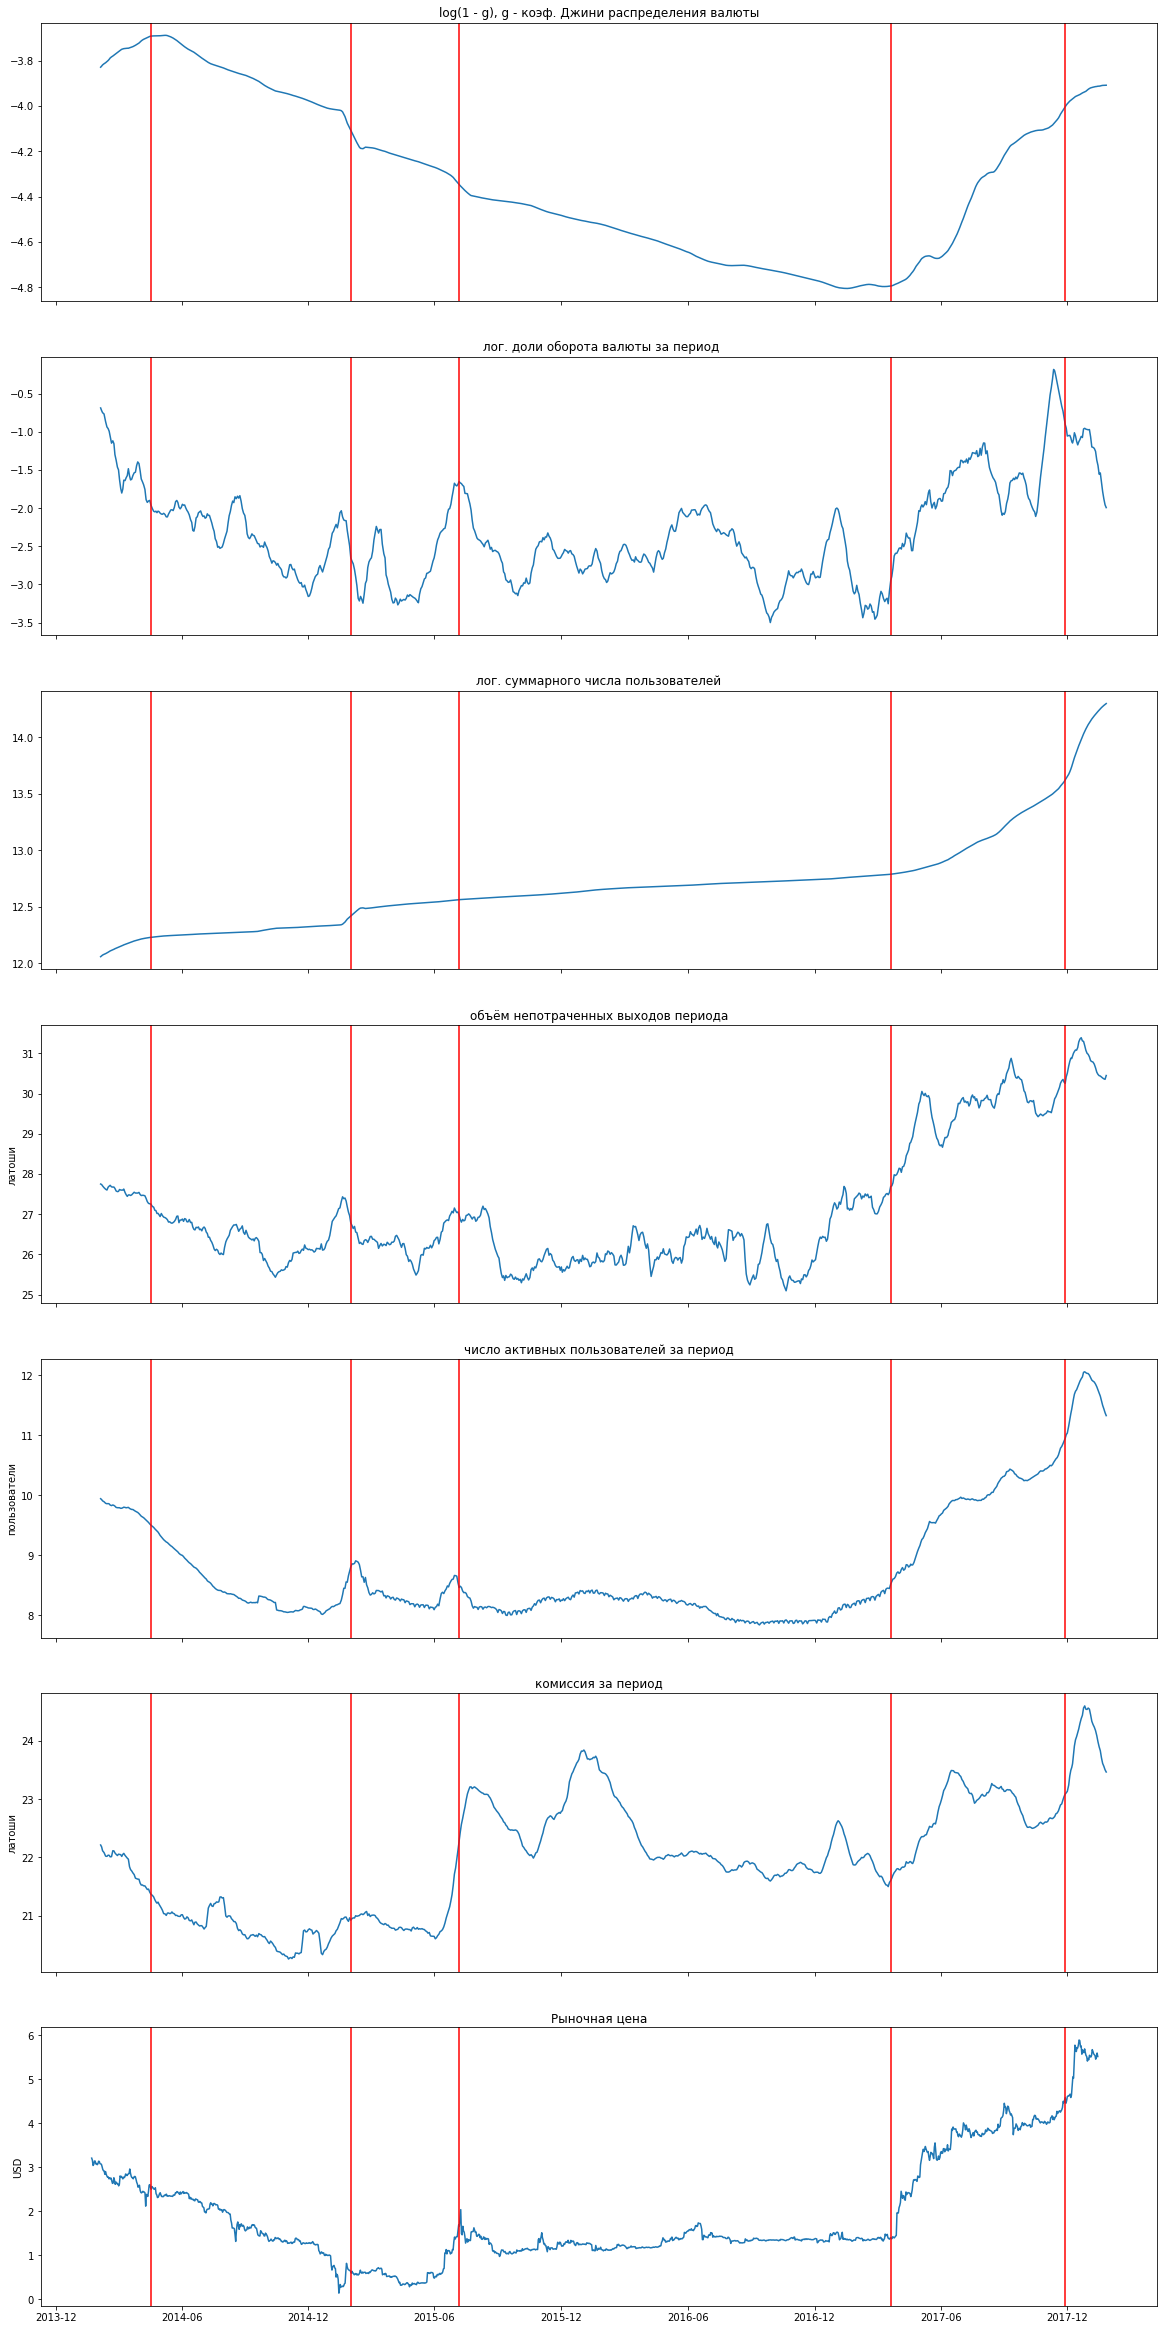

In [81]:
_ = LTC.drawGraph(allMetrics_tag=tag_chart, prices_key='coingecko', begin=500, end=1350,
                  vlines=[460, 550, 720, 810, 1170, 1320])

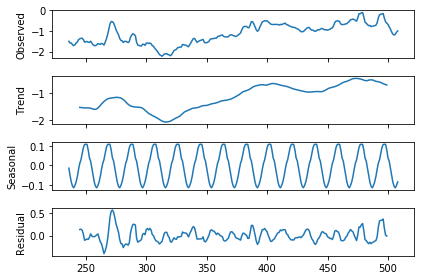

In [139]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(bdf[S_REL_FLOWS], model='additive', freq=19)
_ = result.plot()
#print(result.trend)
#print(result.seasonal)
#print(result.resid)
#print(result.observed)

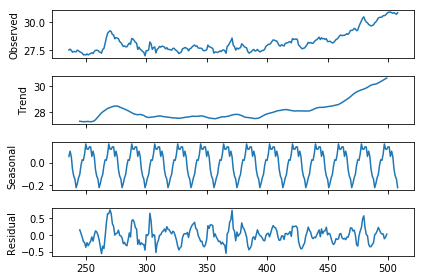

In [148]:
result = seasonal_decompose(bdf1[S_UNSPENTS], model='additive', freq=19)
_ = result.plot()

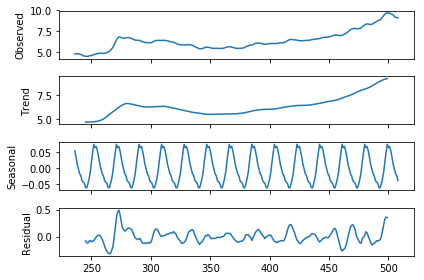

In [158]:
result = seasonal_decompose(bdf1[S_SYNC_PRICES], model='additive', freq=19)
_ = result.plot()

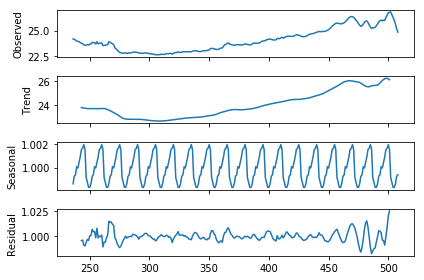

In [156]:
result = seasonal_decompose(bdf1[S_FEES], model='multiplicative', freq=15)
_ = result.plot()

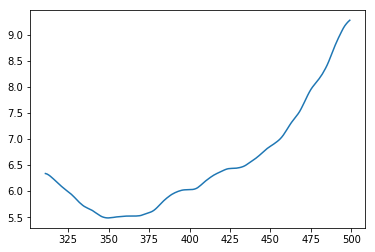

In [164]:
plt.plot(result.trend[75:])

In [165]:
min_p = min(result.trend[75:])

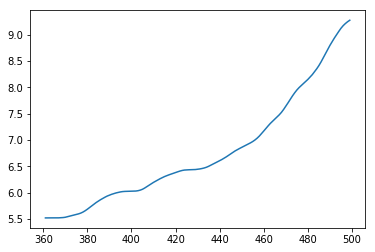

In [166]:
plt.plot(result.trend[125:])

In [ ]:
statsmodels.regression.linear_model.OLS

In [187]:
prices_stable = bdf[S_SYNC_PRICES][70:-10]
stable_index = bdf.index[70:-10]

In [188]:
#x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
#y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
z = np.polyfit(stable_index, , deg=2)
p = np.poly1d(z)

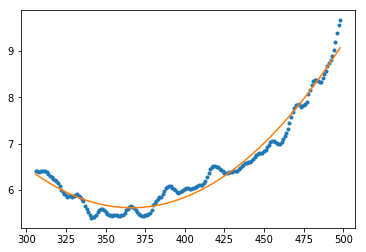

In [189]:
#p = np.poly1d(z)
#p30 = np.poly1d(np.polyfit(x, y, 30))
xp = np.linspace(stable_index[0], stable_index[-1], 100)
_ = plt.plot(stable_index, prices_stable, '.', xp, p(xp), '-')
#plt.ylim(-2,2)
plt.show()

In [79]:
ldf = LTC.allMetrics[tag_mean].copy()
ldf.dropna(inplace=True)

lddf = pd.DataFrame()
for col in ldf:
    lddf[col] = getDiff(ldf[col])
lddf.dropna(inplace=True)

ld2df = pd.DataFrame()
for col in lddf:
    ld2df[col] = getDiff(lddf[col])
ld2df.dropna(inplace=True)

In [74]:
ldf.corr()

,NacamotoCoefs,activeClustersCounts,fees,ginisOfClustersWealth,nonEmptyClustersCounts,relativeFlowVolumes,synchronizedPrices,unspents
NacamotoCoefs,1.000000,0.011886,0.036994,0.661937,-0.581332,-0.033734,-0.026569,-0.080035
activeClustersCounts,0.011886,1.000000,0.426043,0.367550,0.482048,0.646182,0.937636,0.866118
fees,0.036994,0.426043,1.000000,-0.030938,-0.007249,0.243072,0.397775,0.402221
ginisOfClustersWealth,0.661937,0.367550,-0.030938,1.000000,-0.389758,0.232328,0.226544,0.143706
nonEmptyClustersCounts,-0.581332,0.482048,-0.007249,-0.389758,1.000000,0.244502,0.578161,0.517641
relativeFlowVolumes,-0.033734,0.646182,0.243072,0.232328,0.244502,1.000000,0.646478,0.554424
synchronizedPrices,-0.026569,0.937636,0.397775,0.226544,0.578161,0.646478,1.000000,0.869154
unspents,-0.080035,0.866118,0.402221,0.143706,0.517641,0.554424,0.869154,1.000000


In [69]:
bdf.corr()

,NacamotoCoefs,activeClustersCounts,fees,ginisOfClustersWealth,nonEmptyClustersCounts,relativeFlowVolumes,synchronizedPrices,unspents
NacamotoCoefs,1.000000,0.642472,0.584518,-0.741625,0.712510,0.482283,0.365176,0.337781
activeClustersCounts,0.642472,1.000000,0.922760,-0.779540,0.945163,0.731615,0.852285,0.814007
fees,0.584518,0.922760,1.000000,-0.708264,0.847089,0.753392,0.707865,0.754641
ginisOfClustersWealth,-0.741625,-0.779540,-0.708264,1.000000,-0.910541,-0.755910,-0.506947,-0.438279
nonEmptyClustersCounts,0.712510,0.945163,0.847089,-0.910541,1.000000,0.739532,0.788087,0.724822
relativeFlowVolumes,0.482283,0.731615,0.753392,-0.755910,0.739532,1.000000,0.545088,0.600473
synchronizedPrices,0.365176,0.852285,0.707865,-0.506947,0.788087,0.545088,1.000000,0.910435
unspents,0.337781,0.814007,0.754641,-0.438279,0.724822,0.600473,0.910435,1.000000


In [75]:
todaYamamotoDf(ldf)

/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was pro

/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was pro

,NacamotoCoefs,activeClustersCounts,fees,ginisOfClustersWealth,nonEmptyClustersCounts,relativeFlowVolumes,synchronizedPrices,unspents
NacamotoCoefs,NaN,0.774,0.143,0.459,0.007,0.352,0.187,0.899
activeClustersCounts,0.783,NaN,0.048,0.010,0.000,0.024,0.022,0.345
fees,0.092,0.016,NaN,0.351,0.004,0.131,0.010,0.487
ginisOfClustersWealth,0.580,0.000,0.008,NaN,0.000,0.006,0.001,0.320
nonEmptyClustersCounts,0.880,0.000,0.001,0.000,NaN,0.003,0.483,0.743
relativeFlowVolumes,0.315,0.000,0.262,0.040,0.006,NaN,0.001,0.286
synchronizedPrices,0.840,0.000,0.004,0.014,0.000,0.000,NaN,0.018
unspents,0.800,0.000,0.334,0.269,0.017,0.467,0.094,NaN


In [89]:
todaYamamotoDf(bdf)

/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was pro

/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was pro

,NacamotoCoefs,activeClustersCounts,fees,ginisOfClustersWealth,nonEmptyClustersCounts,relativeFlowVolumes,synchronizedPrices,unspents
NacamotoCoefs,NaN,0.145,0.013,0.535,0.335,0.342,0.103,0.388
activeClustersCounts,0.140,NaN,0.000,0.442,0.583,0.014,0.003,0.742
fees,0.631,0.005,NaN,0.058,0.472,0.236,0.019,0.085
ginisOfClustersWealth,0.545,0.000,0.187,NaN,0.454,0.056,0.059,0.000
nonEmptyClustersCounts,0.906,0.553,0.021,0.285,NaN,0.421,0.320,0.165
relativeFlowVolumes,0.423,0.003,0.243,0.033,0.560,NaN,0.005,0.003
synchronizedPrices,0.206,0.056,0.653,0.085,0.336,0.190,NaN,0.032
unspents,0.637,0.992,0.413,0.419,0.036,0.512,0.090,NaN


In [96]:
todaYamamotoDf(ddf2)

/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was pro

/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was pro

,NacamotoCoefs,activeClustersCounts,fees,ginisOfClustersWealth,nonEmptyClustersCounts,relativeFlowVolumes,synchronizedPrices,unspents
NacamotoCoefs,NaN,0.264,0.079,0.482,0.148,0.584,0.153,0.489
activeClustersCounts,0.076,NaN,0.000,0.865,0.837,0.009,0.010,0.972
fees,0.539,0.005,NaN,0.827,0.353,0.254,0.451,0.322
ginisOfClustersWealth,0.646,0.004,0.552,NaN,0.431,0.156,0.398,0.000
nonEmptyClustersCounts,0.769,0.844,0.576,0.254,NaN,0.298,0.372,0.710
relativeFlowVolumes,0.431,0.004,0.230,0.157,0.296,NaN,0.013,0.004
synchronizedPrices,0.156,0.034,0.575,0.088,0.255,0.214,NaN,0.065
unspents,0.491,0.987,0.761,0.259,0.024,0.557,0.478,NaN


In [191]:
todaYamamotoWithCol(bdf, S_FEES, verbose=2)

y=NacamotoCoefs,   x=fees
lag is 12
x resids acorr p: 0.991184214534
y resids acorr 0.999771644919
x does NOT cause y: 0.631
y does NOT cause x: 0.013
-------------------------------
y=activeClustersCounts,   x=fees
lag is 13
x resids acorr p: 0.997820726582
y resids acorr 0.998942768266


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


x does NOT cause y: 0.005
y does NOT cause x: 0.0
-------------------------------
y=ginisOfClustersWealth,   x=fees
lag is 12
x resids acorr p: 0.988666290258
y resids acorr 0.997802634336
x does NOT cause y: 0.058
y does NOT cause x: 0.187
-------------------------------
y=nonEmptyClustersCounts,   x=fees
lag is 14
x resids acorr p: 0.992623201736
y resids acorr 0.949272457843


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


x does NOT cause y: 0.472
y does NOT cause x: 0.021
-------------------------------
y=relativeFlowVolumes,   x=fees
lag is 14
x resids acorr p: 0.992662155706
y resids acorr 0.998025417865
x does NOT cause y: 0.236
y does NOT cause x: 0.243
-------------------------------
y=synchronizedPrices,   x=fees
lag is 14
x resids acorr p: 0.972249169573
y resids acorr 0.998941757597


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


x does NOT cause y: 0.019
y does NOT cause x: 0.653
-------------------------------
y=unspents,   x=fees
lag is 14
x resids acorr p: 0.988118389973
y resids acorr 0.999404269679
x does NOT cause y: 0.085
y does NOT cause x: 0.413
-------------------------------


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [77]:
checkStationarities(ldf)

NacamotoCoefs
prob if stationary: 0.01
prob if NOT stationary: 0.0437739634782
activeClustersCounts
prob if stationary: 0.01
prob if NOT stationary: 0.90371523066
fees
prob if stationary: 0.01978690333307179
prob if NOT stationary: 0.0440570452444
ginisOfClustersWealth
prob if stationary: 0.01
prob if NOT stationary: 0.781779919037
nonEmptyClustersCounts
prob if stationary: 0.01
prob if NOT stationary: 0.978311642233
relativeFlowVolumes


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than 

prob if stationary: 0.1
prob if NOT stationary: 0.00968187270641
synchronizedPrices
prob if stationary: 0.01
prob if NOT stationary: 0.846101640565
unspents
prob if stationary: 0.01
prob if NOT stationary: 0.895055963306


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [78]:
checkStationarities(lddf)

NacamotoCoefs
prob if stationary: 0.1
prob if NOT stationary: 9.11910753815e-10
activeClustersCounts
prob if stationary: 0.1
prob if NOT stationary: 2.6523067712e-07
fees
prob if stationary: 0.1
prob if NOT stationary: 3.7532645744e-08
ginisOfClustersWealth
prob if stationary: 0.01
prob if NOT stationary: 0.00407226424969
nonEmptyClustersCounts
prob if stationary: 0.04955371443184136


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


prob if NOT stationary: 0.00589294720544
relativeFlowVolumes
prob if stationary: 0.1
prob if NOT stationary: 1.05431779458e-10
synchronizedPrices
prob if stationary: 0.1
prob if NOT stationary: 1.01165554169e-06
unspents
prob if stationary: 0.1
prob if NOT stationary: 4.36444418017e-11


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [80]:
checkStationarities(ld2df)

NacamotoCoefs
prob if stationary: 0.1
prob if NOT stationary: 5.6778746955e-25
activeClustersCounts
prob if stationary: 0.1
prob if NOT stationary: 2.25392789723e-19
fees
prob if stationary: 0.1
prob if NOT stationary: 2.22969870895e-22
ginisOfClustersWealth
prob if stationary: 0.1
prob if NOT stationary: 6.56634279018e-16
nonEmptyClustersCounts
prob if stationary: 0.1
prob if NOT stationary: 1.38428368637e-12
relativeFlowVolumes
prob if stationary: 0.1


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than 

prob if NOT stationary: 5.15435252453e-23
synchronizedPrices
prob if stationary: 0.1
prob if NOT stationary: 3.79205338169e-21
unspents
prob if stationary: 0.1
prob if NOT stationary: 3.39426929571e-27


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [235]:
testStationarityTwice(getDiff(ddf[S_UNSPENTS]))

prob if stationary: 0.1
prob if NOT stationary: 2.55598387695e-12


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [110]:
from statsmodels.tsa.api import VAR

In [153]:
model = VAR(bdf[[S_GINIS, S_NCS]])

/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [154]:
orders = model.select_order()

In [167]:
model_fit = model.fit(12)
statsmodels.stats.diagnostic.acorr_ljungbox(model_fit.resid[S_NCS], 12)[1]
statsmodels.stats.diagnostic.acorr_ljungbox(model_fit.resid[S_GINIS], 12)[1]

array([ 0.75523405,  0.93535234,  0.97827432,  0.97534852,  0.98020237,
        0.95730726,  0.95918617,  0.96760634,  0.98369571,  0.93682711,
        0.93095334,  0.89884631])

In [163]:
#model_fit.fittedvalues[S_REL_FLOWS]

In [168]:
model_fit.k_ar

12

In [ ]:
model_fit.acorr(12)

In [155]:
orders.selected_orders

{'aic': 12, 'bic': 7, 'fpe': 12, 'hqic': 12}

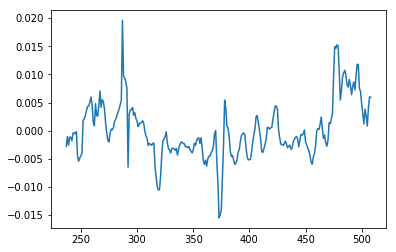

In [157]:
plt.plot(model_fit.resid[S_GINIS])

In [152]:
statsmodels.stats.diagnostic.acorr_ljungbox(model_fit.resid[S_NCS], 12)[1]

array([  5.79581737e-11,   7.74710686e-14,   2.31427213e-15,
         1.86043477e-15,   5.35728912e-19,   2.21429888e-18,
         2.87696847e-18,   2.42347024e-18,   3.56115195e-18,
         3.32230430e-19,   7.67342079e-21,   2.53777341e-20])

In [138]:
grangerCasualityNp(bdf[S_REL_FLOWS], bdf[S_NCS], 12)[11]

array([ 0.342,  0.342,  0.27 ,  0.342,  0.247])

In [239]:
from statsmodels.stats.diagnostic import acorr_ljungbox
def todaYamamoto(y, x, maxlags=None, verbose=0):
    xy = pd.DataFrame({'x': x, 'y': y})
    model = VAR(xy)
    if maxlags is None:
        maxlags = model.select_order().selected_orders['aic']
        if verbose >= 2:
            print('maxlags is', maxlags)
    model_fit = model.fit(maxlags=maxlags)
    lag = model_fit.k_ar
    if verbose >= 1:
        print('lag is', lag)
    
    print('x resids acorr p:', acorr_ljungbox(model_fit.resid['x'], lag)[1].max())
    print('y resids acorr', acorr_ljungbox(model_fit.resid['y'], lag)[1].max())
    
    print('x does NOT cause y:', grangerCasualityNp(y, x, lag)[lag - 1][0])
    print('y does NOT cause x:', grangerCasualityNp(x, y, lag)[lag - 1][0])

In [177]:
todaYamamoto(bdf[S_REL_FLOWS], bdf[S_GINIS])

maxlags is 12
lag is 12
x resids acorr p: 0.997809460852
y resids acorr 0.997491275038
x does NOT cause y: 0.056
y does NOT cause x: 0.033


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [243]:
def todaYamamotoWithCol(df, the_col, verbose=0):
    for a_col in df.columns:
        if not a_col in (the_col, 'times'):
            print('y={},   x={}'.format(a_col, the_col))
            todaYamamoto(df[a_col], df[the_col], verbose=verbose)
            print('-------------------------------')

In [244]:
todaYamamotoWithCol(bdf, S_SYNC_PRICES, verbose=1)

y=NacamotoCoefs,   x=synchronizedPrices
lag is 12
x resids acorr p: 0.987306883676
y resids acorr 0.999700306021
x does NOT cause y: 0.206
y does NOT cause x: 0.103
-------------------------------
y=activeClustersCounts,   x=synchronizedPrices
lag is 13
x resids acorr p: 0.977401367581
y resids acorr 0.978603033818
x does NOT cause y: 0.056
y does NOT cause x: 0.003
-------------------------------
y=fees,   x=synchronizedPrices


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


lag is 14
x resids acorr p: 0.918884327458
y resids acorr 0.937186613336
x does NOT cause y: 0.023
y does NOT cause x: 0.0
-------------------------------
y=ginisOfClustersWealth,   x=synchronizedPrices
lag is 15
x resids acorr p: 0.999088122388
y resids acorr 0.999620464096
x does NOT cause y: 0.085


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


y does NOT cause x: 0.059
-------------------------------
y=nonEmptyClustersCounts,   x=synchronizedPrices
lag is 14
x resids acorr p: 0.9995335909
y resids acorr 0.932430858996
x does NOT cause y: 0.336
y does NOT cause x: 0.32
-------------------------------
y=relativeFlowVolumes,   x=synchronizedPrices
lag is 15
x resids acorr p: 0.996942224916
y resids acorr 0.997052314423
x does NOT cause y: 0.19


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 4
  'rank is %d' % (J, J_), ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 5
  'rank is %d' % (J, J_), ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does 

y does NOT cause x: 0.005
-------------------------------
y=unspents,   x=synchronizedPrices
lag is 12
x resids acorr p: 0.795891804906
y resids acorr 0.932786066414
x does NOT cause y: 0.8
y does NOT cause x: 1.0
-------------------------------


In [190]:
todaYamamotoWithCol(bdf, S_REL_FLOWS)

y=NacamotoCoefs,   x=relativeFlowVolumes
x resids acorr p: 0.996700904484
y resids acorr 0.995625357382
x does NOT cause y: 0.423
y does NOT cause x: 0.342
-------------------------------
y=activeClustersCounts,   x=relativeFlowVolumes
x resids acorr p: 0.993381689253
y resids acorr 0.886886525225
x does NOT cause y: 0.003


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


y does NOT cause x: 0.014
-------------------------------
y=fees,   x=relativeFlowVolumes
x resids acorr p: 0.995022998653
y resids acorr 0.996112076705
x does NOT cause y: 0.117
y does NOT cause x: 0.934
-------------------------------
y=ginisOfClustersWealth,   x=relativeFlowVolumes
x resids acorr p: 0.997491275038
y resids acorr 0.997809460852
x does NOT cause y: 0.033
y does NOT cause x: 0.056
-------------------------------
y=nonEmptyClustersCounts,   x=relativeFlowVolumes


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


x resids acorr p: 0.99661448088
y resids acorr 0.874467122798
x does NOT cause y: 0.56
y does NOT cause x: 0.421
-------------------------------
y=synchronizedPrices,   x=relativeFlowVolumes
x resids acorr p: 0.997052314423
y resids acorr 0.996942224916
x does NOT cause y: 0.005
y does NOT cause x: 0.19
-------------------------------
y=unspents,   x=relativeFlowVolumes


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 9, but rank is 8
  'rank is %d' % (J, J_), ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 10, but rank is 9
  'rank is %d' % (J, J_), ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does

x resids acorr p: 0.992273450761
y resids acorr 0.800810436527
x does NOT cause y: 0.014
y does NOT cause x: 1.0
-------------------------------


In [248]:
todaYamamotoWithCol(bdf, S_NCS, 1)

y=activeClustersCounts,   x=NacamotoCoefs
lag is 14
x resids acorr p: 0.999430665831
y resids acorr 0.960058609792
x does NOT cause y: 0.145
y does NOT cause x: 0.14
-------------------------------
y=fees,   x=NacamotoCoefs
lag is 14
x resids acorr p: 0.999075241192
y resids acorr 0.944659590355
x does NOT cause y: 0.011


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


y does NOT cause x: 0.581
-------------------------------
y=ginisOfClustersWealth,   x=NacamotoCoefs
lag is 12
x resids acorr p: 0.994607906082
y resids acorr 0.983695711822
x does NOT cause y: 0.535
y does NOT cause x: 0.545
-------------------------------
y=nonEmptyClustersCounts,   x=NacamotoCoefs
lag is 13
x resids acorr p: 0.99609307849
y resids acorr 0.963810781967
x does NOT cause y: 0.335
y does NOT cause x: 0.906
-------------------------------
y=relativeFlowVolumes,   x=NacamotoCoefs


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


lag is 12
x resids acorr p: 0.995625357382
y resids acorr 0.996700904484
x does NOT cause y: 0.342
y does NOT cause x: 0.423
-------------------------------
y=synchronizedPrices,   x=NacamotoCoefs
lag is 12
x resids acorr p: 0.999700306021
y resids acorr 0.987306883676
x does NOT cause y: 0.103
y does NOT cause x: 0.206
-------------------------------
y=unspents,   x=NacamotoCoefs
lag is 12
x resids acorr p: 0.994509654183
y resids acorr 0.938012557045
x does NOT cause y: 0.227
y does NOT cause x: 0.171
-------------------------------


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [247]:
todaYamamotoWithCol(bdf, S_FEES, 1)

y=NacamotoCoefs,   x=fees
lag is 14
x resids acorr p: 0.944637951733
y resids acorr 0.999075639686
x does NOT cause y: 0.581
y does NOT cause x: 0.011
-------------------------------
y=activeClustersCounts,   x=fees
lag is 14
x resids acorr p: 0.995221234669
y resids acorr 0.896619029103
x does NOT cause y: 0.0


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


y does NOT cause x: 0.0
-------------------------------
y=ginisOfClustersWealth,   x=fees
lag is 12
x resids acorr p: 0.901765073816
y resids acorr 0.999478357471
x does NOT cause y: 0.057
y does NOT cause x: 0.017
-------------------------------
y=nonEmptyClustersCounts,   x=fees
lag is 12
x resids acorr p: 0.911106024152
y resids acorr 0.567888529108
x does NOT cause y: 1.0
y does NOT cause x: 0.06
-------------------------------
y=relativeFlowVolumes,   x=fees


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 7, but rank is 6
  'rank is %d' % (J, J_), ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 7
  'rank is %d' % (J, J_), ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does 

lag is 14
x resids acorr p: 0.996004785333
y resids acorr 0.994838838586
x does NOT cause y: 0.934
y does NOT cause x: 0.117
-------------------------------
y=synchronizedPrices,   x=fees
lag is 14
x resids acorr p: 0.936795163394
y resids acorr 0.919137699669
x does NOT cause y: 0.0
y does NOT cause x: 0.023
-------------------------------
y=unspents,   x=fees


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


lag is 15
x resids acorr p: 0.702139657843
y resids acorr 0.782912534741
x does NOT cause y: 0.0
y does NOT cause x: 0.0
-------------------------------


In [395]:
bdf[:-1]

,NacamotoCoefs,activeClustersCounts,fees,ginisOfClustersWealth,nonEmptyClustersCounts,relativeFlowVolumes,synchronizedPrices,times,unspents
236,2.4,76405.4,3.183490e+10,-3.909305,13.796953,-1.501054,4.780832,2013-05-20 01:27:13,9.344180e+11
237,2.6,70323.8,3.115314e+10,-3.917940,13.807275,-1.587155,4.800500,2013-05-26 09:31:45,9.954470e+11
238,2.8,63239.8,2.877500e+10,-3.924782,13.815170,-1.582121,4.827393,2013-06-01 05:23:03,9.380164e+11
239,3.0,57896.8,2.553067e+10,-3.933151,13.821637,-1.672538,4.807320,2013-06-06 03:34:30,7.577512e+11
240,3.0,55305.4,2.536594e+10,-3.940061,13.827379,-1.708188,4.767439,2013-06-11 22:09:17,8.132155e+11
241,3.0,53072.0,2.423639e+10,-3.946957,13.832579,-1.671140,4.722011,2013-06-17 10:09:06,8.102716e+11
242,3.0,52454.8,2.249671e+10,-3.954436,13.837622,-1.586595,4.657139,2013-06-23 20:25:36,7.903806e+11
243,3.0,50320.0,2.097004e+10,-3.960468,13.842402,-1.533776,4.569373,2013-06-29 23:10:49,8.832214e+11
244,3.0,50862.4,2.057365e+10,-3.966433,13.847042,-1.418850,4.526991,2013-07-05 23:19:46,8.465595e+11
245,3.0,48634.2,1.779667e+10,-3.972529,13.851636,-1.377191,4.524102,2013-07-11 07:28:20,7.578488e+11


In [5]:
y = np.random.randn(1000)
x = np.zeros(1000)
x_shift = 20
x[:-x_shift] = y[x_shift:]
x[-x_shift:] = np.random.randn(x_shift)
todaYamamoto(y, x, verbose=True)

x resids acorr p: 1.0
y resids acorr 0.000852188176641
x does NOT cause y: 0.0
y does NOT cause x: 0.176


(0.0, 0.17599999999999999)

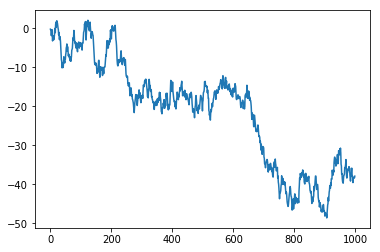

In [7]:
plt.plot(np.cumsum(x))

In [11]:
todaYamamoto(np.cumsum(y), np.cumsum(np.cumsum(x)), verbose=2)

lag is 21
x resids acorr p: 1.0
y resids acorr 3.8658899698e-29
x does NOT cause y: 0.0
y does NOT cause x: 0.171


(0.0, 0.17100000000000001)

In [13]:
testStationarityTwice(np.cumsum(x))

prob if stationary: 0.01
prob if NOT stationary: 0.607350499209


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [16]:
cof = pd.read_csv("https://datazen.info/wp-content/uploads/2012/11/coffee_data.csv",sep=";")

In [19]:
cof.dropna(inplace=True)

In [23]:
cof.columns = ['Date'] + list(cof.columns[1:])

In [24]:
cof.columns

Index(['Date', 'Arabica', 'Robusta'], dtype='object')

In [25]:
cof[-2:]

,Date,Arabica,Robusta
613,2011M02,634.69,241.08
614,2011M03,643.90,260.43


In [33]:
cof1 = cof[192:615]

In [35]:
#cof1

In [37]:
#xy = pd.DataFrame({'Arabica': x, 'y': y})
model = VAR(cof1[['Arabica', 'Robusta']])
#    if maxlags is None:
#        maxlags = model.select_order().selected_orders['aic']

/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [39]:
model.select_order().summary()

,AIC,BIC,FPE,HQIC
0,17.35,17.37,3.434e+07,17.36
1,11.24,11.30,7.621e+04,11.26
2,11.09,11.19*,6.546e+04,11.13
3,11.06,11.19,6.336e+04,11.11*
4,11.06,11.23,6.335e+04,11.13
5,11.05,11.27,6.301e+04,11.14
6,11.03*,11.28,6.154e+04*,11.13
7,11.04,11.34,6.244e+04,11.16
8,11.04,11.38,6.235e+04,11.17
9,11.04,11.41,6.228e+04,11.19


In [45]:
#model.select_order().ics

In [52]:
model_fit = model.fit(maxlags=7, trend='ct')

In [61]:
model_fit.params['Arabica']

const         8.097807
trend         0.003104
L1.Arabica    1.150779
L1.Robusta    0.132064
L2.Arabica   -0.036325
L2.Robusta   -0.204472
L3.Arabica   -0.232307
L3.Robusta    0.273024
L4.Arabica    0.090439
L4.Robusta   -0.279599
L5.Arabica   -0.052212
L5.Robusta    0.008847
L6.Arabica    0.185130
L6.Robusta   -0.119799
L7.Arabica   -0.139132
L7.Robusta    0.196647
Name: Arabica, dtype: float64

In [62]:
model_fit.wald_test_terms

AttributeError: 'VARResults' object has no attribute 'wald_test_terms'

In [79]:
a = statsmodels.tsa.ar_model.ARResults(statsmodels.tsa.ar_model.AR, model_fit.params['Arabica'])

AttributeError: type object 'AR' has no attribute 'data'

In [72]:
a.model

In [76]:
a.wald_test_terms()

AttributeError: 'VARResults' object has no attribute 'data'

In [ ]:
# QQ

In [365]:
tag_l = LTC.gatherAllMetrics({S_NCS:'', S_GINIS:'log21', S_REL_FLOWS:'log', S_FEES:'log', S_SYNC_PRICES:'log',
                              S_UNSPENTS:'log', S_NONEMPTY_CLS:'log', S_CLS_CNTS:'log'})
lbdf = LTC.allMetrics[tag_l][230:].copy()
del lbdf['times']
lbdf_s = prepareToArimax(lbdf)

Gathered under tag 'synchronizedPrices=log_activeClustersCounts=log_unspents=log_ginisOfClustersWealth=log21_NacamotoCoefs=_fees=log_nonEmptyClustersCounts=log_relativeFlowVolumes=log'


In [366]:
new_lbdf = lbdf.copy()
new_lbdf[S_GINIS] = lbdf[S_GINIS] - lbdf[S_GINIS].shift()
new_lbdf[S_NONEMPTY_CLS] = lbdf[S_NONEMPTY_CLS] - lbdf[S_NONEMPTY_CLS].shift()
new_lbdf_s = prepareToArimax(new_lbdf)

In [367]:
%time new_bdf_bests_l = getMetricsAndPCombinationsScores(new_lbdf_s, metrics_list, 5)

/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 0 is done
p = 1 is done
p = 2 is done


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:606: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:607: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:608: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:609: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:609: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()


ginisOfClustersWealth_nonEmptyClustersCounts_unspents is failed
SVD did not converge


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 3 is done


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:650: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:650: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:651: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:651: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:50

NacamotoCoefs_activeClustersCounts_ginisOfClustersWealth_nonEmptyClustersCounts_unspents is failed
SVD did not converge


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarni

p = 4 is done


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Conve

p = 5 is done
CPU times: user 48min 15s, sys: 33min 33s, total: 1h 21min 48s
Wall time: 40min 8s


In [368]:
new_bdf_bests_l

{'0': ('NacamotoCoefs_activeClustersCounts_fees_ginisOfClustersWealth_nonEmptyClustersCounts_synchronizedPrices_unspents',
  0.56106820458680151),
 '1': ('NacamotoCoefs_activeClustersCounts_fees_ginisOfClustersWealth_nonEmptyClustersCounts_synchronizedPrices_unspents',
  0.55193438666906869),
 '2': ('NacamotoCoefs_activeClustersCounts_fees_ginisOfClustersWealth_nonEmptyClustersCounts_unspents',
  0.55149993524527063),
 '3': ('NacamotoCoefs_activeClustersCounts_fees_ginisOfClustersWealth_nonEmptyClustersCounts_synchronizedPrices_unspents',
  0.55076105807289344),
 '4': ('NacamotoCoefs_fees_synchronizedPrices_unspents', 0.54691206433517481),
 '5': ('NacamotoCoefs_activeClustersCounts_fees_ginisOfClustersWealth_nonEmptyClustersCounts_synchronizedPrices_unspents',
  0.54842209417986543)}

In [369]:
%time new_bdf_wop_bests_l = getMetricsAndPCombinationsScores(new_lbdf_s, metrics_list_wo_prices, 5)

/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 0 is done
p = 1 is done
p = 2 is done


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:606: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:607: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:608: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:609: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:609: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()


ginisOfClustersWealth_nonEmptyClustersCounts_unspents is failed
SVD did not converge
p = 3 is done


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:650: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:650: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:651: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:651: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:50

NacamotoCoefs_activeClustersCounts_ginisOfClustersWealth_nonEmptyClustersCounts_unspents is failed
SVD did not converge


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 4 is done


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 5 is done
CPU times: user 19min 33s, sys: 14min 26s, total: 33min 59s
Wall time: 16min 4s


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [370]:
new_bdf_wop_bests_l

{'0': ('NacamotoCoefs_activeClustersCounts_fees_ginisOfClustersWealth_nonEmptyClustersCounts_unspents',
  0.56110505219566376),
 '1': ('NacamotoCoefs_activeClustersCounts_fees_ginisOfClustersWealth_nonEmptyClustersCounts_unspents',
  0.55194073102515562),
 '2': ('NacamotoCoefs_activeClustersCounts_fees_ginisOfClustersWealth_nonEmptyClustersCounts_unspents',
  0.55149993524527063),
 '3': ('NacamotoCoefs_activeClustersCounts_fees_ginisOfClustersWealth_nonEmptyClustersCounts_unspents',
  0.55077361737221264),
 '4': ('NacamotoCoefs_activeClustersCounts_nonEmptyClustersCounts_unspents',
  0.54776747721190344),
 '5': ('NacamotoCoefs_activeClustersCounts_fees_ginisOfClustersWealth_nonEmptyClustersCounts_unspents',
  0.54842969304497213)}

/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:650: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:650: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:651: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:651: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianI

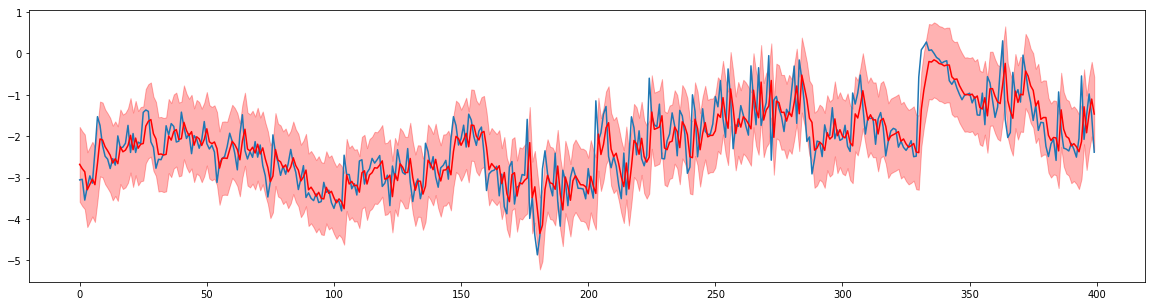

In [371]:
# NEW
predictions_confs_new_bdf_s_L_400 = ARIMAX_WalkForwardValidation(new_lbdf_s[[S_NCS, S_SYNC_PRICES, S_FEES, S_UNSPENTS, S_REL_FLOWS]].dropna(),
                             S_REL_FLOWS, -400, (4, 1, 1))

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


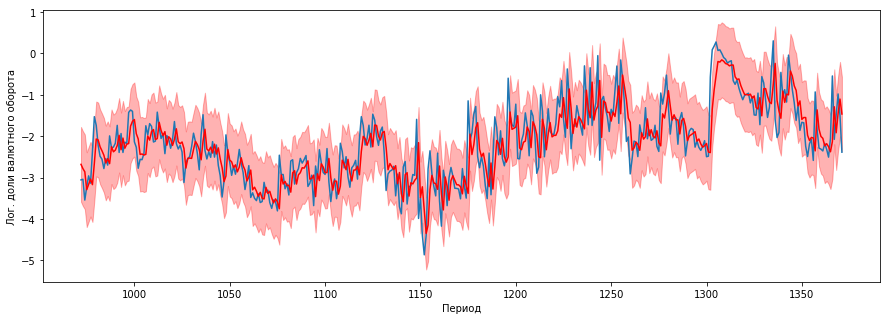

In [378]:
_l400 = drawForecastResults(new_lbdf_s[S_REL_FLOWS], predictions_confs_new_bdf_s_L_400)

In [377]:
_l400 = saveJson(predictions_confs_new_bdf_s_L_400, 'predictions_confs_new_bdf_s_L_400_LOG')

TypeError: Int64Index([ 972,  973,  974,  975,  976,  977,  978,  979,  980,  981,
            ...
            1362, 1363, 1364, 1365, 1366, 1367, 1368, 1369, 1370, 1371],
           dtype='int64', length=400) is not JSON serializable

In [379]:
_l400.savefig('LTC_new_bdf_s_400_LOG.png')